<p> <img src="https://servicos.nc.ufpr.br/PortalNC/painel/assets/img/logos/logo_ufpr.jpg" width="250" height="250" align="right">
UNIVERSIDADE FEDERAL DO PARANÁ <br>
CE329 - APRENDIZAGEM DE MAQUINA <br>
Profº: Eduardo Vargas Ferreira <br>
Alunos:  GRR20233876 – Leonardo Gonçalves Fischer <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;GRR20233881 – Raymundo Eduardo Pilz <br>
</p>

# ANÁLISE DE CHURN EM UMA INSTITUIÇÃO FINANCEIRA

## PROBLEMÁTICA:
O problema a ser abordado neste trabalho é a taxa de churn em uma instituição financeira. A taxa 
de churn, que se refere à perda de clientes ao longo do tempo, é uma métrica crítica para empresas 
de serviços financeiros, pois afeta diretamente a receita e a satisfação do cliente. O objetivo deste 
estudo é analisar e compreender os fatores que podem estar contribuindo para o churn de clientes 
e identificar estratégias para reduzi-lo.
### DESCRIÇÃO DO PROBLEMA:
Conhecer a taxa de churn de qualquer instituição é importante visto que para a empresa custa muito 
mais captar um novo cliente do que manter um que já possui.
Compreender esses fatores é fundamental para tomar decisões informadas que permite a 
companhia desenvolver programas de leadade e implementar estratégias que aumentem a retenção 
de clientes.
## OBJETIVOS:
* Análise exploratória e descritiva dos principais indicadores e características dos clientes, tais 
como:
    * Pontuação de crédito;
    * Localização;
    * Gênero;
    * Idade;
    * Tempo de permanência;
    * Saldo da conta;
    * Número de produtos;
    * Uso de cartão de crédito
    * Atividade de conta;
    * Salário estimado;
    * Churn;
    * Reclamações realizadas pelo cliente;
    * Índice de satisfação do cliente;
    * Tipo de cartão;
    * Pontos Acumulados.
* Identificação e correção de possíveis inconsistências nos dados fornecidos;
* Identificar quais dessas características têm maior correlação com o churn de clientes;
* Modelos de predições dos dados para explorar padrões e tendências nos dados relacionados 
ao churn;
* Comparações com modelos com todos os resultados gerados;
* Propor recomendações estratégicas com base nos insights obtidos para reduzir a taxa de churn.

## dataset disponivel em: 
https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn

# 1. Importando biblioteca e tratamento dos dados do dataset

Nesta seção, serão organizado todas as bibliotecas que serão utilizadas no projeto. O objetivo é manter estruturado as biblioteca armazenadas nesta seção para sua melhor visualização.

In [150]:
# Carregando as bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import math

# 2. ELT (Extração, Limpeza e Transformação de Dados)

Inicialmente será carregado o conjunto de dados extraído do Kaggle, prepará-lo e transformá-lo para que os dados se tornem informações valiosas e possam ser usados efetivamente em nossa análise.

## 2.1 Carregamento dos Dados

Primeiramente, realizaremos o carregamento do conjunto de dados e uma visualização inicial dos dados carregados.

In [2]:
## Carregando os dados

data = pd.read_csv('dataset\\Customer-Churn-Records.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [3]:
# Verificando o volume de dados do dataset
shape = data.shape
print("O conjunto de dados possui {} linhas e {} colunas.".format(shape[0], shape[1]))

O conjunto de dados possui 10000 linhas e 18 colunas.


## 2.2 Verificação de Dados Faltantes

Agora, realizaremos a verificação das colunas que contêm dados faltantes em nosso conjunto de dados. A identificação de variáveis com valores ausentes é fundamental, pois isso pode impactar nossa análise e determinar a necessidade de tratamento dos dados.

In [4]:
# Verificando colunas com dados faltantes
data_na = data.isnull().sum()
cols_na = data_na[data_na > 0]

if cols_na.empty:
    print("Nenhuma coluna possui dados ausentes.")
else:
    print(f"{len(cols_na)} coluna(s) possui(em) dados ausentes.")
    print("Colunas com dados ausentes:")
    for col, missing_count in cols_na.items():
        print(f"{col}: {missing_count} valor(es) ausente(s)")


Nenhuma coluna possui dados ausentes.


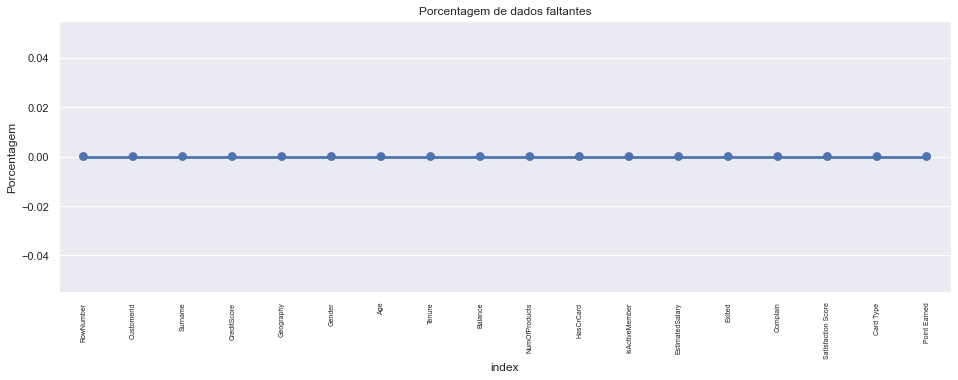

In [5]:
# Representação gráfica
# Verificando colunas com dados faltantes
data_na = pd.DataFrame((data.isnull().sum() * 100 / data.shape[0])).reset_index()

# Gráfico
plt.figure (figsize = (16,5))
ax = sns.pointplot('index', 0, data = data_na)
plt.xticks(rotation = 90,fontsize = 7)
plt.title("Porcentagem de dados faltantes")
plt.ylabel("Porcentagem")
plt.show()

## 2.3 Verificação e Exclusão de Dados Duplicadas
Nesta etapa, realizaremos a verificação de dados duplicados. Embora seja improvável que tenhamos dados duplicados neste conjunto de dados, é uma etapa importante para garantir a integridade de nossa análise. Vamos verificar e, se necessário, remover qualquer entrada duplicada.

Para evitar interferências na detecção de dados duplicados, também excluiremos a coluna "RowNumber" de nosso conjunto de dados, pois esta coluna parece ser uma numeração automática das linhas.

In [6]:
# Eliminando a coluna RowNumber
data = data.drop(['RowNumber'], axis=1)

In [7]:
# Verificando linhas duplicadas
rows_data = data[data.duplicated()]

if rows_data.empty:
    print("Nenhum dado duplicado foi encontrado no conjunto de dados.")
else:
    print(f"Foram encontradas {len(rows_data)} entradas duplicadas.")   
        

Nenhum dado duplicado foi encontrado no conjunto de dados.


In [8]:
# Caso houvessem linhas duplicadas, seriam excluidas e impresso o novo conjunto de dados
data = data.drop_duplicates()
data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


## 2.4 Renomeando Títulos
Nesta etapa, realizaremos a renomeação dos títulos das colunas para torná-los mais descritivos e facilitar o estudo e a compreensão dos dados.

Isso nos ajudará a trabalhar com os dados de forma mais eficiente e compreensível em etapas posteriores da análise.


In [9]:
# Alterando nome das Colunas
data = data.rename(columns={"CustomerId": "ID",
                            "Surname": "Sobrenome",
                            "CreditScore": "PontuacaoCredito", 
                            "Geography": "Localizacao", 
                            "Gender": "Genero",
                            "Age": "Idade",
                            "Tenure": "TempoPermanencia",
                            "Balance": "Saldo",
                            "NumOfProducts": "Produtos",
                            "HasCrCard": "TemCartaoCredito",
                            "IsActiveMember": "MembroAtivo",
                            "EstimatedSalary": "SalarioEstimado",
                            "Exited": "Churn",
                            "Complain": "Reclamacoes",
                            "Satisfaction Score": "IndiceSatisfacao",
                            "Card Type": "TipoCartao",
                            "Point Earned": "PontosAcumulados"})
data.head()

,ID,Sobrenome,PontuacaoCredito,Localizacao,Genero,Idade,TempoPermanencia,Saldo,Produtos,TemCartaoCredito,MembroAtivo,SalarioEstimado,Churn,Reclamacoes,IndiceSatisfacao,TipoCartao,PontosAcumulados
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


## 2.5 Exclusão de Colunas Desnecessárias

Nesta etapa, procederemos com a exclusão de colunas que são consideradas desnecessárias para nossa análise. A exclusão de colunas que não são relevantes ou não contribuem para nossos objetivos pode simplificar o conjunto de dados e tornar nossa análise mais eficiente.

Após a exclusão, atualizaremos o conjunto de dados resultante para refletir a nova estrutura.

In [10]:
# Excluindo colunas desnecessarias (Importante que este processo seja executado depois de exclusão de linhas duplicadas, uma vez que pode ter cliente com perfis semelhantes evitando que esses dados sejam suprimidos)
data = data.drop(['ID', 
                  'Sobrenome'],
                 axis=1)
data.head()

,PontuacaoCredito,Localizacao,Genero,Idade,TempoPermanencia,Saldo,Produtos,TemCartaoCredito,MembroAtivo,SalarioEstimado,Churn,Reclamacoes,IndiceSatisfacao,TipoCartao,PontosAcumulados
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


## 2.6 Informações Gerais do Conjunto de Dados

Nesta etapa, exploraremos informações gerais sobre o conjunto de dados para compreender sua estrutura e características. Isso nos ajudará a ter uma visão inicial dos dados com os quais estamos trabalhando.

In [11]:
# Obter informações gerais do conjunto de dados
data.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PontuacaoCredito  10000 non-null  int64  
 1   Localizacao       10000 non-null  object 
 2   Genero            10000 non-null  object 
 3   Idade             10000 non-null  int64  
 4   TempoPermanencia  10000 non-null  int64  
 5   Saldo             10000 non-null  float64
 6   Produtos          10000 non-null  int64  
 7   TemCartaoCredito  10000 non-null  int64  
 8   MembroAtivo       10000 non-null  int64  
 9   SalarioEstimado   10000 non-null  float64
 10  Churn             10000 non-null  int64  
 11  Reclamacoes       10000 non-null  int64  
 12  IndiceSatisfacao  10000 non-null  int64  
 13  TipoCartao        10000 non-null  object 
 14  PontosAcumulados  10000 non-null  int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 1.2+ MB


# 3. EDA (Análise Exploratória dos Dados)
Após a conclusão do primeiro processo de tratamento e transformação do conjunto de dados, avançaremos para a etapa de Análise Exploratória dos Dados (EDA). Durante esta fase, examinaremos cada variável individualmente para identificar seu valor para o estudo. Além disso, faremos uma análise comparativa entre cada variável e a variável alvo "Churn," que é o foco principal de nosso estudo.
        

## 3.1 Análise Individual das Variáveis

Começaremos a análise exploratória examinando cada variável separadamente. Isso inclui:

- Cálculo de estatísticas descritivas, como média, mediana e desvio padrão para variáveis numéricas.
- Criação de gráficos e visualizações relevantes para cada tipo de variável.
- Identificação de tendências, padrões ou características únicas em cada variável.
- O comportamento da variável em relação aos clientes que sairam e que não sairam da empresa.

Iniciaremos a nossa análise exploratória conhecendo so dados das variáveis através do resumo fornecido com informações referente a quantidade de dados, média, desvio-padrão, quartis, valores mínimo e máximo, média e mediana. Estes dados estatístivos auxiliam na compreensão e tendências de comportamento das varáveis.

In [330]:
# Resumo dos dados do dataset
data.describe()

,PontuacaoCredito,Idade,TempoPermanencia,Saldo,Produtos,TemCartaoCredito,MembroAtivo,SalarioEstimado,Churn,Reclamacoes,IndiceSatisfacao,PontosAcumulados
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


### 3.1.1 Churn

A variável **CHURN** demonstra os clientes que permaneceram ou deixaram a empresa até a data da coleta de dados. 

Assim sendo, vamos quantificar e visualizar esses dados. Além disso, exibiremos a proporção de clientes que saíram e permaneceram na empresa.

In [331]:
# Contando a quantidade de clientes
clientes_churn = data['Churn'].value_counts()

# Substituindo os valores 0 e 1 pelos rótulos correspondentes
clientes_churn.index = clientes_churn.index.map({0: 'Não', 1: 'Sim'})

# Criando um DataFrame a partir dos valores contados
tb_churn = pd.DataFrame({'Churn': clientes_churn.index, 
                          'Clientes': clientes_churn.values})

# Adicionando uma linha de total ao DataFrame
total_clientes = tb_churn['Clientes'].sum()
linha_total = pd.DataFrame({'Churn': ['Total'], 
                            'Clientes': [total_clientes]})
tb_churn = pd.concat([tb_churn, linha_total], ignore_index=True)

# Exibindo a tabela
print(tb_churn)


   Churn  Clientes
0    Não      7962
1    Sim      2038
2  Total     10000


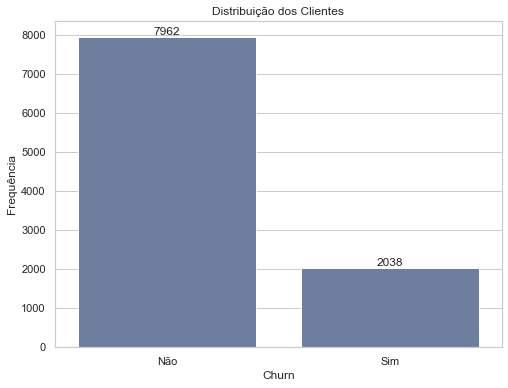

In [335]:
# Graficamente
# Contando a quantidade de clientes
clientes_churn = data['Churn'].value_counts()

# Substituindo os valores 0 e 1 pelos rótulos correspondentes
clientes_churn.index = clientes_churn.index.map({0: 'Não', 1: 'Sim'})

# Gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=clientes_churn.index, 
            y=clientes_churn.values, 
            color='#657BA6')
plt.xlabel('Churn')
plt.ylabel('Frequência')
plt.title('Distribuição dos Clientes')

# Adicionando os rótulos de dados
for index, value in enumerate(clientes_churn.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()

In [336]:
# Proporção de clientes churn
percentual_churn = 100*data['Churn'].value_counts()/len(data['Churn'])

# Substituindo os valores 0 e 1 pelos rótulos correspondentes
percentual_churn.index = percentual_churn.index.map({0: 'Não', 1: 'Sim'})

print(percentual_churn)

Não    79.62
Sim    20.38
Name: Churn, dtype: float64


### 3.1.2 Pontuação de Crédito

Na variável **PONTUAÇÃO DE CRÉDITO** vamos explorar as distribuição destes dados e como elas estão relacionadas com o **Churn**.

In [12]:
# Resumo dos dados da variável Pontuação de Crédito
data['PontuacaoCredito'].describe()

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: PontuacaoCredito, dtype: float64

Usaremos um 'histograma' para visualizar a distribuição das pontuações de crédito. Isso nos permitirá entender como as pontuações estão dispersas e identificar padrões na distribuição.

Adiante será exibido um 'boxplot' para detecção de outliers, que podem, futuramente, ser eliminados do nosso modelo. 

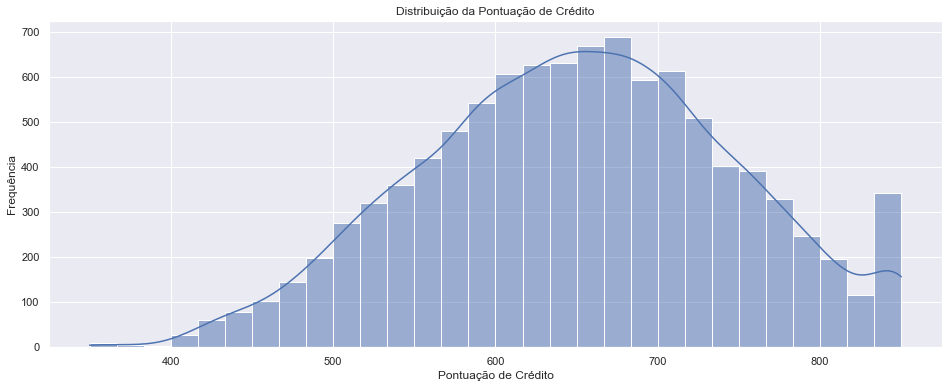

In [13]:
# Histograma para visualizar a distribuição dos dados
plt.figure(figsize=(16, 6))
sns.histplot(data['PontuacaoCredito'], bins=30, kde=True)
plt.title('Distribuição da Pontuação de Crédito')
plt.xlabel('Pontuação de Crédito')
plt.ylabel('Frequência')
plt.show()

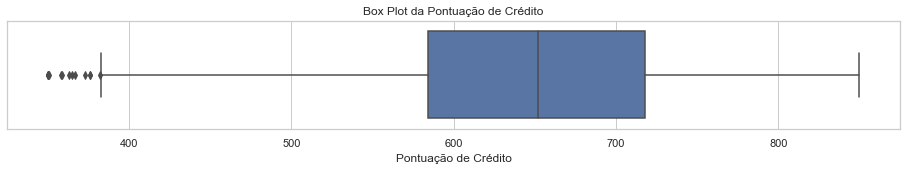

In [15]:
# Criação do boxplot
sns.set(style="whitegrid")

plt.figure(figsize=(16, 2))
sns.boxplot(x='PontuacaoCredito', data=data)
plt.title('Box Plot da Pontuação de Crédito')
plt.xlabel('Pontuação de Crédito')
plt.show()

Será definido uma divisão em grupos para melhor formatação e visualização dos dados. Com essa nova formatação, é possível identificar melhor, visualmente, a relação com a variável **churn** e, consequentemente, auxiliar na compreensão do comportamento das duas variáveis.

In [14]:
# Definir os rótulos dos grupos
labels = ["{0} - {1}".format(i, i + 49) for i in range(301, 850, 50)]

# Criar uma nova coluna com base nos intervalos
data['PontuacaoCredito_grupo'] =  pd.cut(data.PontuacaoCredito,
                                        bins=range(301, 901, 50),
                                        right=False,
                                        labels=labels)

# Verificando os dados da nova coluna
data['PontuacaoCredito_grupo'].value_counts()

651 - 700    1947
601 - 650    1871
701 - 750    1518
551 - 600    1445
501 - 550     978
751 - 800     953
801 - 850     645
451 - 500     454
401 - 450     170
351 - 400      14
301 - 350       5
Name: PontuacaoCredito_grupo, dtype: int64

In [26]:
# Agrupar os dados e contar as ocorrências de Churn e Não Churn
grouped_PontCredito = data.groupby('PontuacaoCredito_grupo')['Churn'].value_counts().unstack(fill_value=0)

# Calcular percentuais de Churn e Não Churn
grouped_PontCredito['Total'] = grouped_PontCredito[0] + grouped_PontCredito[1]
grouped_PontCredito['Não_Churn_Percent'] = (grouped_PontCredito[0] / grouped_PontCredito['Total']) * 100
grouped_PontCredito['Churn_Percent'] = (grouped_PontCredito[1] / grouped_PontCredito['Total']) * 100

# Renomear as colunas
grouped_PontCredito.columns = ['Não Churn', 'Churn', 'Total', 'Freq Não Churn', 'Freq Churn']

grouped_PontCredito.reset_index(inplace=True)

# Exibir a tabela
print(grouped_PontCredito)

   PontuacaoCredito_grupo  Não Churn  Churn  Total  Freq Não Churn  Freq Churn
0               301 - 350          0      5      5        0.000000  100.000000
1               351 - 400          0     14     14        0.000000  100.000000
2               401 - 450        128     42    170       75.294118   24.705882
3               451 - 500        363     91    454       79.955947   20.044053
4               501 - 550        762    216    978       77.914110   22.085890
5               551 - 600       1148    297   1445       79.446367   20.553633
6               601 - 650       1479    392   1871       79.048637   20.951363
7               651 - 700       1586    361   1947       81.458654   18.541346
8               701 - 750       1212    306   1518       79.841897   20.158103
9               751 - 800        766    187    953       80.377754   19.622246
10              801 - 850        518    127    645       80.310078   19.689922


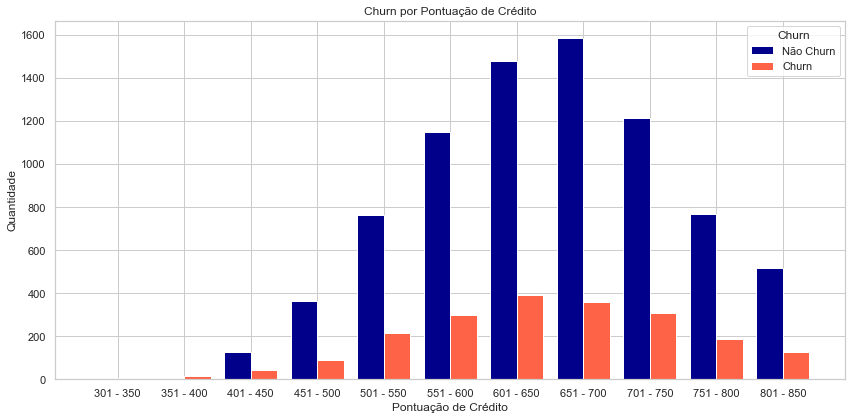

In [66]:
# Agrupar os dados por PontuacaoCredito_grupo e Churn e contar as ocorrências
grouped_PontCredito = data.groupby(['PontuacaoCredito_grupo', 'Churn']).size().unstack(fill_value=0)

# Definir os rótulos das categorias e a largura das barras
categories = grouped_PontCredito.index
x = np.arange(len(categories))
width = 0.4

# Criar o gráfico de barras agrupadas
fig, ax = plt.subplots(figsize = (12, 6))
for i, (churn_label, color) in enumerate(zip([0, 1], ['darkblue', 'tomato'])):
    values = grouped_PontCredito[churn_label].values
    ax.bar(x + i * width, values, width, label=churn_label, color=color)

# Personalizar o gráfico
ax.set_xlabel('Pontuação de Crédito')
ax.set_ylabel('Quantidade')
ax.set_title('Churn por Pontuação de Crédito')
ax.set_xticks(x + width / 2)
ax.set_xticklabels(categories, rotation=0)

# Adicionar legenda
legend_labels = ['Não Churn', 'Churn']
ax.legend((legend_labels), title='Churn')

plt.tight_layout()
plt.show()


* Boxplot de clientes Churn e não-Churn da variável **Pontuação de Crédito**

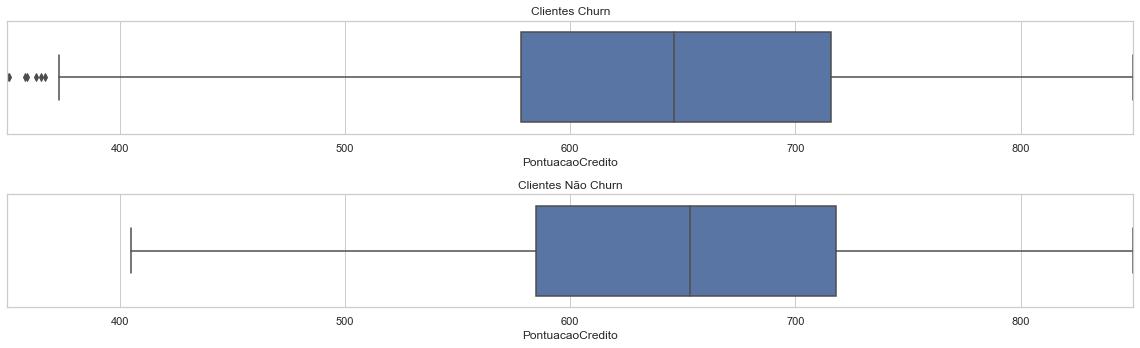

In [69]:
# Box plot da Pontuação de Crédito para clientes Churn e não-Churn
sns.set(style="whitegrid")

# Definindo os limites para equalizações dos boxplot
lim_min_pontcredito = min(data['PontuacaoCredito'])
lim_max_pontcredito = max(data['PontuacaoCredito'])

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16, 5))

# Box plot 1 (Clientes Churn)
sns.boxplot(ax=axes[0], x='PontuacaoCredito', data=data[data['Churn'] == 1])
axes[0].set_title('Clientes Churn')

# Definir limites iguais para os eixos x
axes[0].set_xlim(lim_min_pontcredito, lim_max_pontcredito)

# Box plot 2 (Clientes Não Churn)
sns.boxplot(ax=axes[1], x='PontuacaoCredito', data=data[data['Churn'] == 0])
axes[1].set_title('Clientes Não Churn')

# Definir limites iguais para os eixos x
axes[1].set_xlim(lim_min_pontcredito, lim_max_pontcredito)

# Ajustar o layout
plt.tight_layout()

# Exibir o gráfico
plt.show()

### 3.1.3 Idade


A exploração da variável **IDADE** será semelhante a realizada na Pontuação de Crédito.

In [30]:
# Resumo dos dados da variável Idade
data['Idade'].describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Idade, dtype: float64

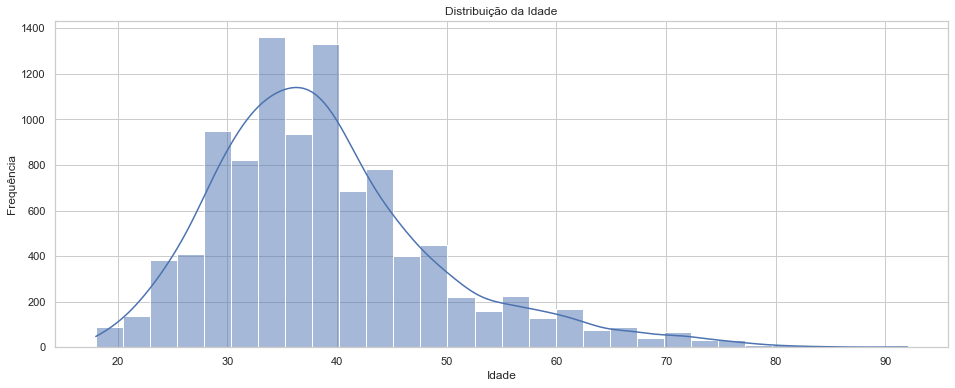

In [109]:
# Histograma
plt.figure(figsize=(16, 6))
sns.histplot(data['Idade'], bins=30, kde=True)
plt.title('Distribuição da Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

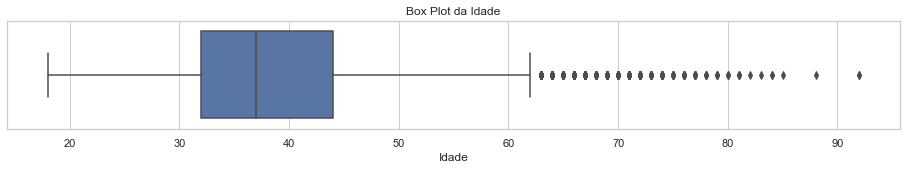

In [110]:
# Boxplot
sns.set(style="whitegrid")

plt.figure(figsize=(16, 2))
sns.boxplot(x='Idade', data=data)
plt.title('Box Plot da Idade')
plt.xlabel('Idade')
plt.show()

* Divindo em um grupo

In [136]:
# Definir os rótulos dos grupos
labels = ["{0} - {1}".format(i, i + 9) 
          for i in range(11, 101, 10)]

# Criar uma nova coluna
data['Idade_grupo'] =  pd.cut(data.Idade,
                              bins=range(11, 102, 10),
                              right=False,
                              labels=labels)

# Verificando os dados da nova coluna
data['Idade_grupo'].value_counts()

31 - 40     4451
41 - 50     2320
21 - 30     1879
51 - 60      797
61 - 70      331
71 - 80      121
11 - 20       89
81 - 90       10
91 - 100       2
Name: Idade_grupo, dtype: int64

In [137]:
# Agrupar os dados e contar as ocorrências de Churn e Não Churn
grouped_Idade = data.groupby('Idade_grupo')['Churn'].value_counts().unstack(fill_value=0)

# Calcular percentuais de Churn e Não Churn
grouped_Idade['Total'] = grouped_Idade[0] + grouped_Idade[1]
grouped_Idade['Não_Churn_Percent'] = (grouped_Idade[0] / grouped_Idade['Total']) * 100
grouped_Idade['Churn_Percent'] = (grouped_Idade[1] / grouped_Idade['Total']) * 100

# Renomear as colunas
grouped_Idade.columns = ['Não Churn', 'Churn', 'Total', 'Freq Não Churn', 'Freq Churn']

grouped_Idade.reset_index(inplace=True)

# Exibir a tabela
print(grouped_Idade)

  Idade_grupo  Não Churn  Churn  Total  Freq Não Churn  Freq Churn
0     11 - 20         84      5     89       94.382022    5.617978
1     21 - 30       1736    143   1879       92.389569    7.610431
2     31 - 40       3912    539   4451       87.890362   12.109638
3     41 - 50       1532    788   2320       66.034483   33.965517
4     51 - 60        349    448    797       43.789210   56.210790
5     61 - 70        227    104    331       68.580060   31.419940
6     71 - 80        111     10    121       91.735537    8.264463
7     81 - 90          9      1     10       90.000000   10.000000
8    91 - 100          2      0      2      100.000000    0.000000


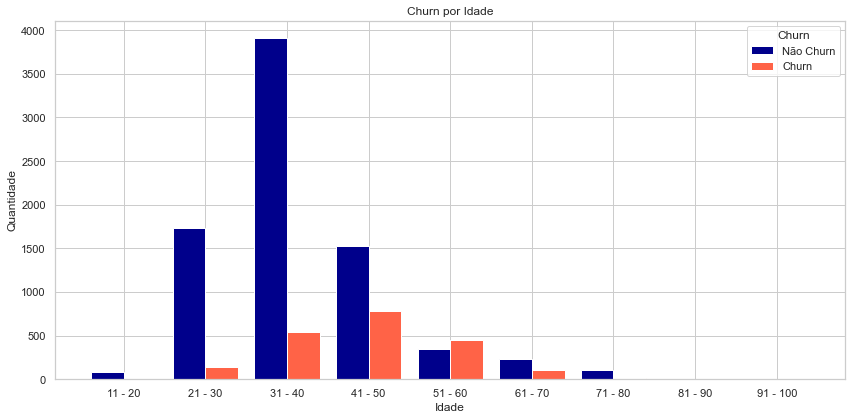

In [138]:
# Agrupar os dados e contar as ocorrências
grouped_Idade = data.groupby(['Idade_grupo', 'Churn']).size().unstack(fill_value=0)

# Definir os rótulos das categorias e a largura das barras
categories = grouped_Idade.index
x = np.arange(len(categories))
width = 0.4

# Criar o gráfico de barras agrupadas
fig, ax = plt.subplots(figsize = (12, 6))
for i, (churn_label, color) in enumerate(zip([0, 1], ['darkblue', 'tomato'])):
    values = grouped_Idade[churn_label].values
    ax.bar(x + i * width, values, width, label=churn_label, color=color)

# Personalizar o gráfico
ax.set_xlabel('Idade')
ax.set_ylabel('Quantidade')
ax.set_title('Churn por Idade')
ax.set_xticks(x + width / 2)
ax.set_xticklabels(categories, rotation=0)

# Adicionar legenda
legend_labels = ['Não Churn', 'Churn']
ax.legend((legend_labels), title='Churn')

plt.tight_layout()
plt.show()

* Boxplot de clientes Churn e não-Churn da variável **Idade**

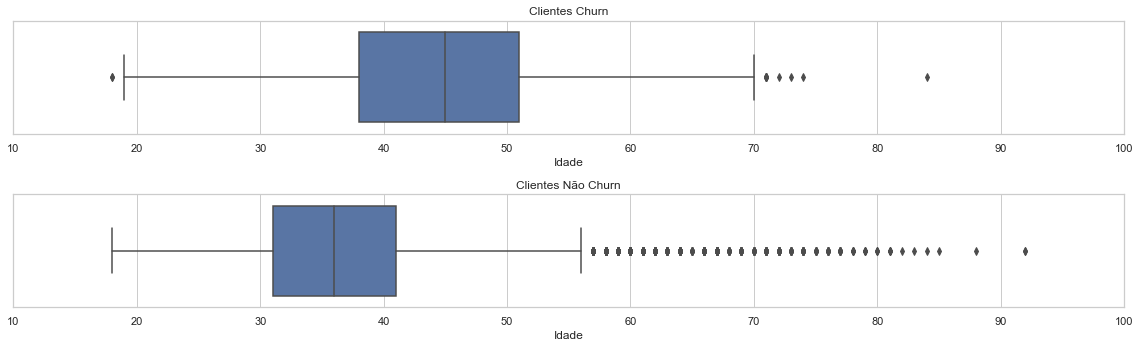

In [345]:
# Box plot da Pontuação de Crédito para clientes Churn e não-Churn
sns.set(style="whitegrid")

# Definindo os limites para equalizações dos boxplot
lim_min_idade = math.floor(min(data['Idade'])/ 10) * 10
lim_max_idade = math.ceil(max(data['Idade']) / 10) * 10

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16, 5))

# Box plot 1 (Clientes Churn)
sns.boxplot(ax=axes[0], x='Idade', data=data[data['Churn'] == 1])
axes[0].set_title('Clientes Churn')

# Definir limites iguais para os eixos x
axes[0].set_xlim(lim_min_idade, lim_max_idade)

# Box plot 2 (Clientes Não Churn)
sns.boxplot(ax=axes[1], x='Idade', data=data[data['Churn'] == 0])
axes[1].set_title('Clientes Não Churn')

# Definir limites iguais para os eixos x
axes[1].set_xlim(lim_min_idade, lim_max_idade)

# Ajustar o layout
plt.tight_layout()

# Exibir o gráfico
plt.show()

### 3.1.4 Tempo Permanência


Na variável **TEMPO DE PERMANÊNCIA** o intervalo dos dados é menor, não sendo necessário fazer uma classificação por grupo.

In [31]:
# Resumo dos dados
data['TempoPermanencia'].describe()

count    10000.000000
mean         5.012800
std          2.892174
min          0.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         10.000000
Name: TempoPermanencia, dtype: float64

In [170]:
# Contando a quantidade de clientes
clientes_permanencia = data['TempoPermanencia'].value_counts()

# Criando um DataFrame a partir dos valores contados
tb_permanencia = pd.DataFrame({'Tempo Permanência (Anos)': clientes_permanencia.index, 
                               'Clientes': clientes_permanencia.values})

# Adicionando uma linha de total ao DataFrame
total_clientes = tb_permanencia['Clientes'].sum()
linha_total = pd.DataFrame({'Tempo Permanência (Anos)': ['Total'], 
                            'Clientes': [total_clientes]})
tb_permanencia = pd.concat([tb_permanencia, linha_total], ignore_index=True)

# Exibindo a tabeçla
print(tb_permanencia)

   Tempo Permanência (Anos)  Clientes
0                         2      1048
1                         1      1035
2                         7      1028
3                         8      1025
4                         5      1012
5                         3      1009
6                         4       989
7                         9       984
8                         6       967
9                        10       490
10                        0       413
11                    Total     10000


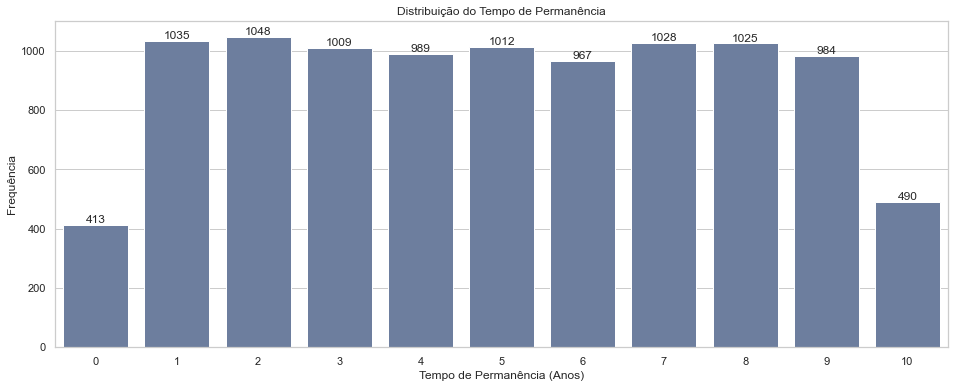

In [311]:
# Ordenando a série
frequencia_permanencia = frequencia_permanencia.sort_index()

# Gráfico de barras
plt.figure(figsize=(16, 6))
sns.barplot(x=frequencia_permanencia.index, 
            y=frequencia_permanencia.values, 
            color='#657BA6')
plt.xlabel('Tempo de Permanência (Anos)')
plt.ylabel('Frequência')
plt.title('Distribuição do Tempo de Permanência')

# Adicionando os rótulos de dados com alinhamento correto
for index, value in enumerate(frequencia_permanencia.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()

In [181]:
# Agrupar os dados e contar as ocorrências de Churn e Não Churn
grouped_permanencia = data.groupby('TempoPermanencia')['Churn'].value_counts().unstack(fill_value=0)

# Calcular percentuais de Churn e Não Churn
grouped_permanencia['Total'] = grouped_permanencia[0] + grouped_permanencia[1]
grouped_permanencia['Não_Churn_Percent'] = (grouped_permanencia[0] / grouped_permanencia['Total']) * 100
grouped_permanencia['Churn_Percent'] = (grouped_permanencia[1] / grouped_permanencia['Total']) * 100

# Renomear as colunas
grouped_permanencia.columns = ['Não Churn', 'Churn', 'Total', 'Freq Não Churn', 'Freq Churn']

# Resetar o índice para ter 'PontuacaoCredito_grupo' como uma coluna
grouped_permanencia.reset_index(inplace=True)

# Exibir a tabela
print(grouped_permanencia)

    TempoPermanencia  Não Churn  Churn  Total  Freq Não Churn  Freq Churn
0                  0        318     95    413       76.997579   23.002421
1                  1        803    232   1035       77.584541   22.415459
2                  2        847    201   1048       80.820611   19.179389
3                  3        796    213   1009       78.889990   21.110010
4                  4        786    203    989       79.474216   20.525784
5                  5        803    209   1012       79.347826   20.652174
6                  6        771    196    967       79.731127   20.268873
7                  7        851    177   1028       82.782101   17.217899
8                  8        828    197   1025       80.780488   19.219512
9                  9        770    214    984       78.252033   21.747967
10                10        389    101    490       79.387755   20.612245


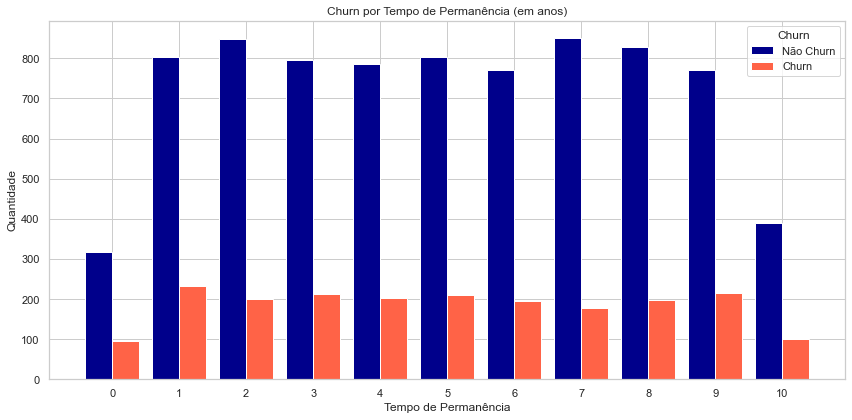

In [342]:
# Agrupar os dados e contar as ocorrências
grouped_permanencia = data.groupby(['TempoPermanencia', 'Churn']).size().unstack(fill_value=0)

# Definir os rótulos das categorias e a largura das barras
categories = grouped_permanencia.index
x = np.arange(len(categories))
width = 0.4

# Criar o gráfico de barras agrupadas
fig, ax = plt.subplots(figsize = (12, 6))
for i, (churn_label, color) in enumerate(zip([0, 1], ['darkblue', 'tomato'])):
    values = grouped_permanencia[churn_label].values
    ax.bar(x + i * width, values, width, label=churn_label, color=color)

# Personalizar o gráfico
ax.set_xlabel('Tempo de Permanência')
ax.set_ylabel('Quantidade')
ax.set_title('Churn por Tempo de Permanência (em anos)')
ax.set_xticks(x + width / 2)
ax.set_xticklabels(categories, rotation=0)

# Adicionar legenda
legend_labels = ['Não Churn', 'Churn']
ax.legend((legend_labels), title='Churn')

plt.tight_layout()
plt.show()

### 3.1.5 Saldo em Conta


Na variável **SALDO EM CONTA** o intervalo de dados é maior, e, assim, será agrupado os dados para melhor visualização

In [32]:
# Resumo dos dados da variável Saldo em Conta
data['Saldo'].describe()

count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: Saldo, dtype: float64

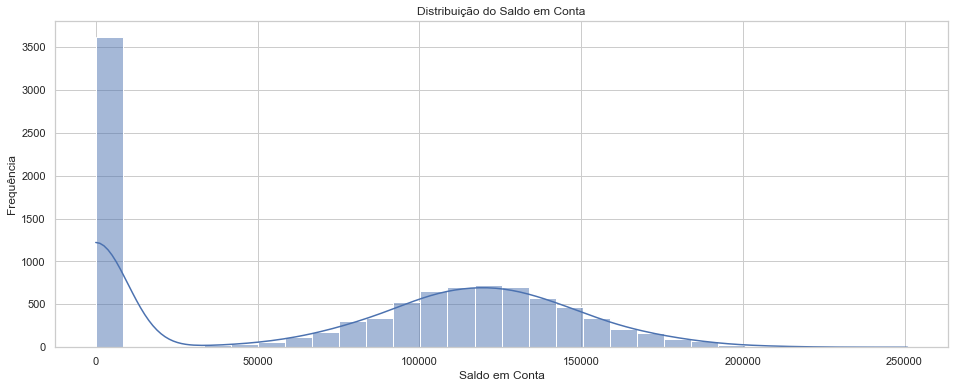

In [343]:
# Histograma 
plt.figure(figsize=(16, 6))
sns.histplot(data['Saldo'], bins=30, kde=True)
plt.title('Distribuição do Saldo em Conta')
plt.xlabel('Saldo em Conta')
plt.ylabel('Frequência')
plt.show()

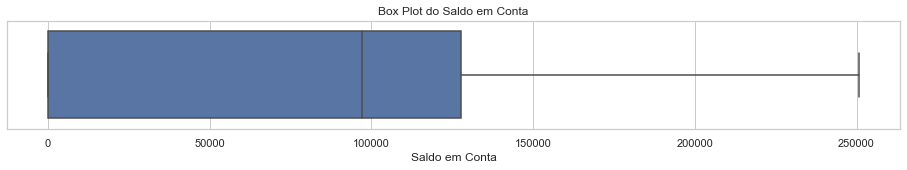

In [192]:
# Boxplot
sns.set(style="whitegrid")

plt.figure(figsize=(16, 2))
sns.boxplot(x='Saldo', data=data)
plt.title('Box Plot do Saldo em Conta')
plt.xlabel('Saldo em Conta')
plt.show()

In [205]:
# Definir os rótulos dos grupos
labels = ["{0} - {1}".format(i, i + 24999) 
          for i in range(0, 275000, 25000)]

# Criar uma nova coluna "Saldo_grupo" com base nos intervalos
data['Saldo_grupo'] = pd.cut(data.Saldo,
                             bins=range(0, 275001, 25000),
                             right=False,
                             labels=labels)

# Verificando os dados da nova coluna
data['Saldo_grupo'].value_counts()

0 - 24999          3623
100000 - 124999    2068
125000 - 149999    1762
75000 - 99999      1160
150000 - 174999     738
50000 - 74999       349
175000 - 199999     197
25000 - 49999        69
200000 - 224999      32
225000 - 249999       1
250000 - 274999       1
Name: Saldo_grupo, dtype: int64

In [206]:
# Agrupar os dados e contar as ocorrências de Churn e Não Churn
grouped_saldo = data.groupby('Saldo_grupo')['Churn'].value_counts().unstack(fill_value=0)

# Calcular percentuais de Churn e Não Churn
grouped_saldo['Total'] = grouped_saldo[0] + grouped_saldo[1]
grouped_saldo['Não_Churn_Percent'] = (grouped_saldo[0] / grouped_saldo['Total']) * 100
grouped_saldo['Churn_Percent'] = (grouped_saldo[1] / grouped_saldo['Total']) * 100

# Renomear as colunas
grouped_saldo.columns = ['Não Churn', 'Churn', 'Total', 'Freq Não Churn', 'Freq Churn']

# Resetar o índice para ter 'PontuacaoCredito_grupo' como uma coluna
grouped_saldo.reset_index(inplace=True)

# Exibir a tabela
print(grouped_saldo)

        Saldo_grupo  Não Churn  Churn  Total  Freq Não Churn  Freq Churn
0         0 - 24999       3119    504   3623       86.088877   13.911123
1     25000 - 49999         47     22     69       68.115942   31.884058
2     50000 - 74999        274     75    349       78.510029   21.489971
3     75000 - 99999        934    226   1160       80.517241   19.482759
4   100000 - 124999       1510    558   2068       73.017408   26.982592
5   125000 - 149999       1333    429   1762       75.652667   24.347333
6   150000 - 174999        582    156    738       78.861789   21.138211
7   175000 - 199999        148     49    197       75.126904   24.873096
8   200000 - 224999         15     17     32       46.875000   53.125000
9   225000 - 249999          0      1      1        0.000000  100.000000
10  250000 - 274999          0      1      1        0.000000  100.000000


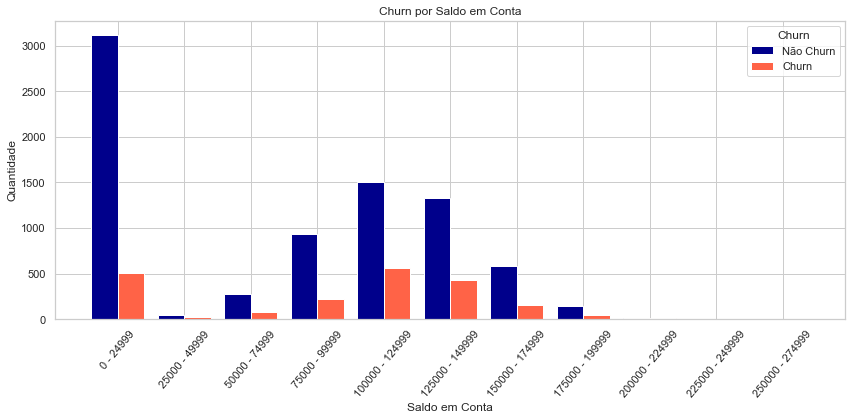

In [344]:
# Agrupar os dados e contar as ocorrências
grouped_saldo = data.groupby(['Saldo_grupo', 'Churn']).size().unstack(fill_value=0)

# Definir os rótulos das categorias e a largura das barras
categories = grouped_saldo.index
x = np.arange(len(categories))
width = 0.4

# Criar o gráfico de barras agrupadas
fig, ax = plt.subplots(figsize = (12, 6))
for i, (churn_label, color) in enumerate(zip([0, 1], ['darkblue', 'tomato'])):
    values = grouped_saldo[churn_label].values
    ax.bar(x + i * width, values, width, label=churn_label, color=color)

# Personalizar o gráfico
ax.set_xlabel('Saldo em Conta')
ax.set_ylabel('Quantidade')
ax.set_title('Churn por Saldo em Conta')
ax.set_xticks(x + width / 2)
ax.set_xticklabels(categories, rotation=50)

# Adicionar legenda
legend_labels = ['Não Churn', 'Churn']
ax.legend((legend_labels), title='Churn')

plt.tight_layout()
plt.show()

In [ ]:
# Box plot da Pontuação de Crédito para clientes Churn e não-Churn
sns.set(style="whitegrid")

# Definindo os limites para equalizações dos boxplot
lim_min_pontcredito = math.floor(min(data['Idade'])/ 10) * 10
lim_max_pontcredito = math.ceil(max(data['Idade']) / 10) * 10

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16, 5))

# Box plot 1 (Clientes Churn)
sns.boxplot(ax=axes[0], x='Idade', data=data[data['Churn'] == 1])
axes[0].set_title('Clientes Churn')

# Definir limites iguais para os eixos x
axes[0].set_xlim(lim_min_pontcredito, lim_max_pontcredito)

# Box plot 2 (Clientes Não Churn)
sns.boxplot(ax=axes[1], x='Idade', data=data[data['Churn'] == 0])
axes[1].set_title('Clientes Não Churn')

# Definir limites iguais para os eixos x
axes[1].set_xlim(lim_min_pontcredito, lim_max_pontcredito)

# Ajustar o layout
plt.tight_layout()

# Exibir o gráfico
plt.show()

### 3.1.6 Salário


A variável **SALÁRIO** temos uma estimativa do salário dos clientes.

In [35]:
# Resumo dos dados da variável Salario Estimado
data['SalarioEstimado'].describe()

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: SalarioEstimado, dtype: float64

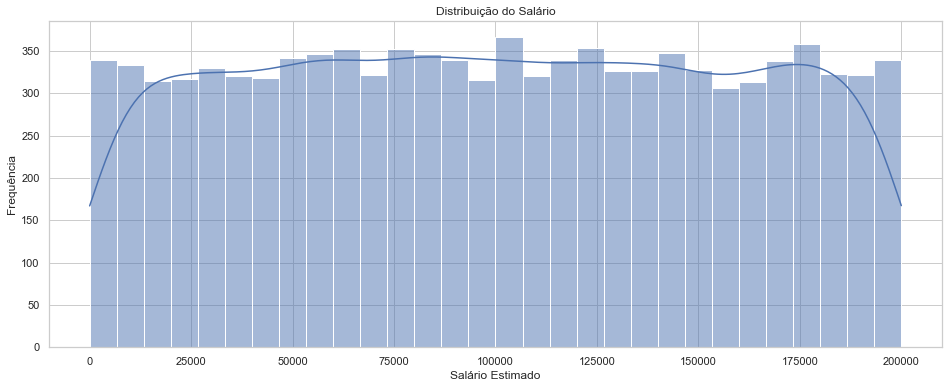

In [346]:
# Histograma 
plt.figure(figsize=(16, 6))
sns.histplot(data['SalarioEstimado'], bins=30, kde=True)
plt.title('Distribuição do Salário')
plt.xlabel('Salário Estimado')
plt.ylabel('Frequência')
plt.show()

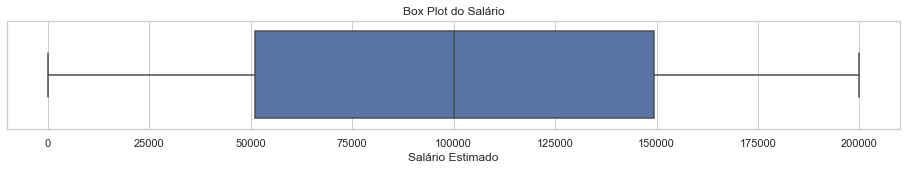

In [347]:
# Boxplot
sns.set(style="whitegrid")

plt.figure(figsize=(16, 2))
sns.boxplot(x='SalarioEstimado', data=data)
plt.title('Box Plot do Salário')
plt.xlabel('Salário Estimado')
plt.show()

In [254]:
# Definir os rótulos dos grupos
labels = ["{0} - {1}".format(i, i + 19999) for i in range(0, 200000, 20000)]

# Criar uma nova coluna "Salario_grupo" com base nos intervalos
data['Salario_grupo'] = pd.cut(data.SalarioEstimado,
                                bins=range(0, 200001, 20000),
                                right=False,
                                labels=labels)

# Verificando os dados da nova coluna
data['Salario_grupo'].value_counts()


60000 - 79999      1027
100000 - 119999    1027
160000 - 179999    1009
120000 - 139999    1007
40000 - 59999      1006
80000 - 99999      1002
0 - 19999           986
180000 - 199999     985
140000 - 159999     982
20000 - 39999       969
Name: Salario_grupo, dtype: int64

In [255]:
# Agrupar os dados e contar as ocorrências de Churn e Não Churn
grouped_Salario = data.groupby('Salario_grupo')['Churn'].value_counts().unstack(fill_value=0)

# Calcular percentuais de Churn e Não Churn
grouped_Salario['Total'] = grouped_Salario[0] + grouped_Salario[1]
grouped_Salario['Não_Churn_Percent'] = (grouped_Salario[0] / grouped_Salario['Total']) * 100
grouped_Salario['Churn_Percent'] = (grouped_Salario[1] / grouped_Salario['Total']) * 100

# Renomear as colunas
grouped_Salario.columns = ['Não Churn', 'Churn', 'Total', 'Freq Não Churn', 'Freq Churn']

grouped_Salario.reset_index(inplace=True)

# Exibir a tabela
print(grouped_Salario)

     Salario_grupo  Não Churn  Churn  Total  Freq Não Churn  Freq Churn
0        0 - 19999        788    198    986       79.918864   20.081136
1    20000 - 39999        773    196    969       79.772962   20.227038
2    40000 - 59999        815    191   1006       81.013917   18.986083
3    60000 - 79999        815    212   1027       79.357352   20.642648
4    80000 - 99999        806    196   1002       80.439122   19.560878
5  100000 - 119999        816    211   1027       79.454722   20.545278
6  120000 - 139999        811    196   1007       80.536246   19.463754
7  140000 - 159999        776    206    982       79.022403   20.977597
8  160000 - 179999        784    225   1009       77.700694   22.299306
9  180000 - 199999        778    207    985       78.984772   21.015228


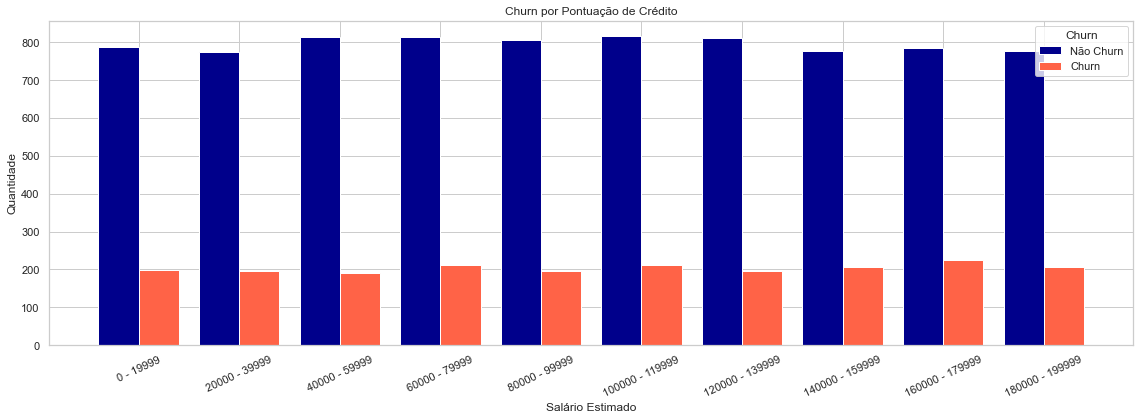

In [259]:
# Agrupar os dados e contar as ocorrências de Churn e Não Churn
grouped_Salario = data.groupby('Salario_grupo')['Churn'].value_counts().unstack(fill_value=0)

# Definir os rótulos das categorias e a largura das barras
categories = grouped_Salario.index
x = np.arange(len(categories))
width = 0.4

# Criar o gráfico de barras agrupadas
fig, ax = plt.subplots(figsize = (16, 6))
for i, (churn_label, color) in enumerate(zip([0, 1], ['darkblue', 'tomato'])):
    values = grouped_Salario[churn_label].values
    ax.bar(x + i * width, values, width, label=churn_label, color=color)

# Personalizar o gráfico
ax.set_xlabel('Salário Estimado')
ax.set_ylabel('Quantidade')
ax.set_title('Churn por Salário')
ax.set_xticks(x + width / 2)
ax.set_xticklabels(categories, rotation=25)

# Adicionar legenda
legend_labels = ['Não Churn', 'Churn']
ax.legend((legend_labels), title='Churn')

plt.tight_layout()
plt.show()

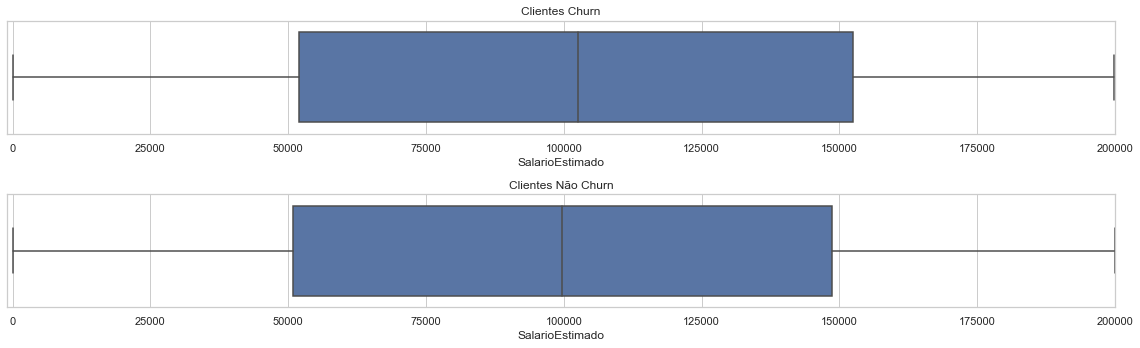

In [270]:
# Box plot para clientes Churn e não-Churn
sns.set(style="whitegrid")

# Definindo os limites para equalizações dos boxplot
lim_min_salario = -1000
lim_max_salario = math.ceil(max(data['SalarioEstimado']) / 10000) * 10000

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16, 5))

# Box plot 1 (Clientes Churn)
sns.boxplot(ax=axes[0], x='SalarioEstimado', data=data[data['Churn'] == 1])
axes[0].set_title('Clientes Churn')

# Definir limites iguais para os eixos x
axes[0].set_xlim(lim_min_salario, lim_max_salario)

# Box plot 2 (Clientes Não Churn)
sns.boxplot(ax=axes[1], x='SalarioEstimado', data=data[data['Churn'] == 0])
axes[1].set_title('Clientes Não Churn')

# Definir limites iguais para os eixos x
axes[1].set_xlim(lim_min_salario, lim_max_salario)

# Ajustar o layout
plt.tight_layout()

# Exibir o gráfico
plt.show()

### 3.1.7 Índice de Satisfação


O **ÍNDICE DE SATISFAÇÃO** é feito através de uma avaliação do cliente de 1 a 5, do qual infere-se que a distribuição dos dados é homogênea, tanto quando avaliado a variável individualmente, quanto quando avaliado pelo Churn.

In [37]:
# Resumo dos dados da variável Indice de Satisfação
data['IndiceSatisfacao'].describe()

count    10000.000000
mean         3.013800
std          1.405919
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: IndiceSatisfacao, dtype: float64

In [351]:
# Contando a quantidade de clientes
clientes_satisafacao = data['IndiceSatisfacao'].value_counts()

# Criando um DataFrame a partir dos valores contados
tb_satisfacao = pd.DataFrame({'Satifação': clientes_satisafacao.index, 
                               'Clientes': clientes_satisafacao.values})

# Adicionando uma linha de total ao DataFrame
total_clientes = tb_satisfacao['Clientes'].sum()
linha_total = pd.DataFrame({'Satifação': ['Total'], 
                            'Clientes': [total_clientes]})
tb_satisfacao = pd.concat([tb_satisfacao, linha_total], ignore_index=True)

# Exibindo a tabeçla
print(tb_satisfacao)

  Satifação  Clientes
0         3      2042
1         2      2014
2         4      2008
3         5      2004
4         1      1932
5     Total     10000


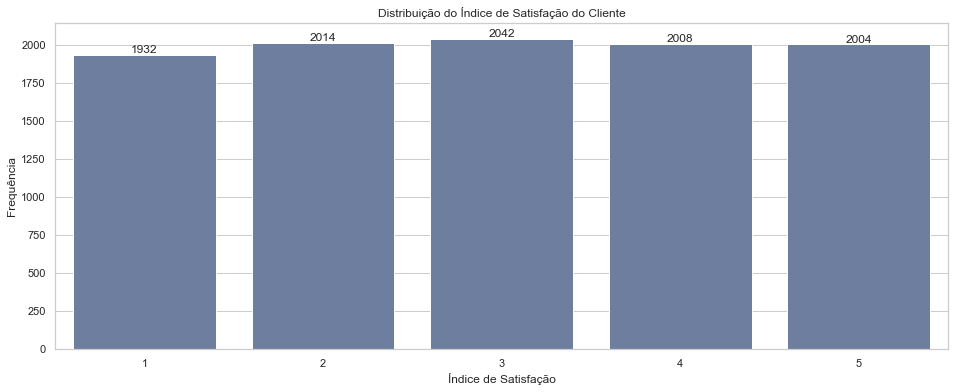

In [352]:
# Contagem de frequência
frequencia_satisfacao = data['IndiceSatisfacao'].value_counts()

# Ordenando a série
frequencia_satisfacao = frequencia_satisfacao.sort_index()

# Gráfico de barras
plt.figure(figsize=(16, 6))
sns.barplot(x=frequencia_satisfacao.index, 
            y=frequencia_satisfacao.values, 
            color='#657BA6')
plt.xlabel('Índice de Satisfação')
plt.ylabel('Frequência')
plt.title('Distribuição do Índice de Satisfação do Cliente')

# Adicionando os rótulos de dados com alinhamento correto
for index, value in enumerate(frequencia_satisfacao.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()

In [315]:
# Agrupar os dados e contar as ocorrências de Churn e Não Churn
grouped_satisfacao = data.groupby('IndiceSatisfacao')['Churn'].value_counts().unstack(fill_value=0)

# Calcular percentuais de Churn e Não Churn
grouped_satisfacao['Total'] = grouped_satisfacao[0] + grouped_satisfacao[1]
grouped_satisfacao['Não_Churn_Percent'] = (grouped_satisfacao[0] / grouped_satisfacao['Total']) * 100
grouped_satisfacao['Churn_Percent'] = (grouped_satisfacao[1] / grouped_satisfacao['Total']) * 100

# Renomear as colunas
grouped_satisfacao.columns = ['Não Churn', 'Churn', 'Total', 'Freq Não Churn', 'Freq Churn']

grouped_satisfacao.reset_index(inplace=True)

# Exibir a tabela
print(grouped_satisfacao)

   IndiceSatisfacao  Não Churn  Churn  Total  Freq Não Churn  Freq Churn
0                 1       1545    387   1932       79.968944   20.031056
1                 2       1575    439   2014       78.202582   21.797418
2                 3       1641    401   2042       80.362390   19.637610
3                 4       1594    414   2008       79.382470   20.617530
4                 5       1607    397   2004       80.189621   19.810379


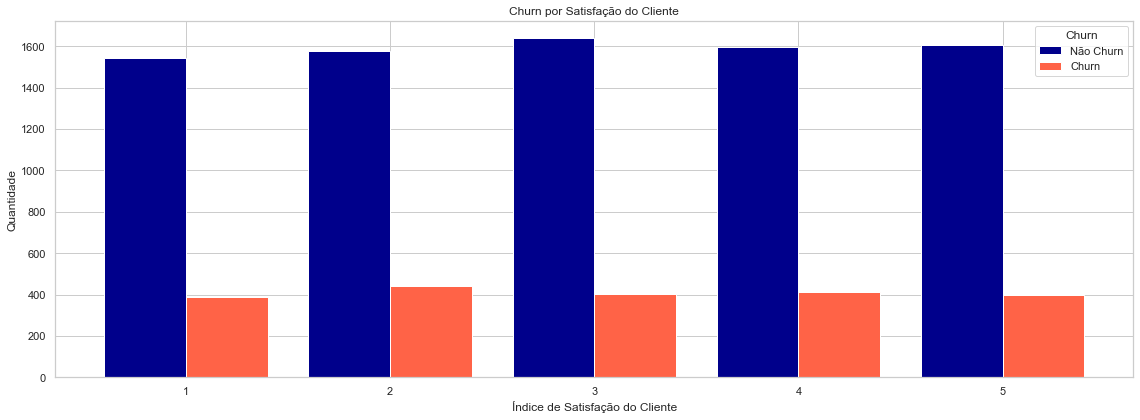

In [353]:
# Agrupar os dados e contar as ocorrências de Churn e Não Churn
grouped_satisfacao = data.groupby('IndiceSatisfacao')['Churn'].value_counts().unstack(fill_value=0)

# Definir os rótulos das categorias e a largura das barras
categories = grouped_satisfacao.index
x = np.arange(len(categories))
width = 0.4

# Criar o gráfico de barras agrupadas
fig, ax = plt.subplots(figsize = (16, 6))
for i, (churn_label, color) in enumerate(zip([0, 1], ['darkblue', 'tomato'])):
    values = grouped_satisfacao[churn_label].values
    ax.bar(x + i * width, values, width, label=churn_label, color=color)

# Personalizar o gráfico
ax.set_xlabel('Índice de Satisfação do Cliente')
ax.set_ylabel('Quantidade')
ax.set_title('Churn por Satisfação do Cliente')
ax.set_xticks(x + width / 2)
ax.set_xticklabels(categories, rotation=0)

# Adicionar legenda
legend_labels = ['Não Churn', 'Churn']
ax.legend((legend_labels), title='Churn')

plt.tight_layout()
plt.show()

### 3.1.8 Pontos Acumulados

In [283]:
# Resumo dos dados da variável PontosAcumulados
data['PontosAcumulados'].describe()

count    10000.000000
mean       606.515100
std        225.924839
min        119.000000
25%        410.000000
50%        605.000000
75%        801.000000
max       1000.000000
Name: PontosAcumulados, dtype: float64

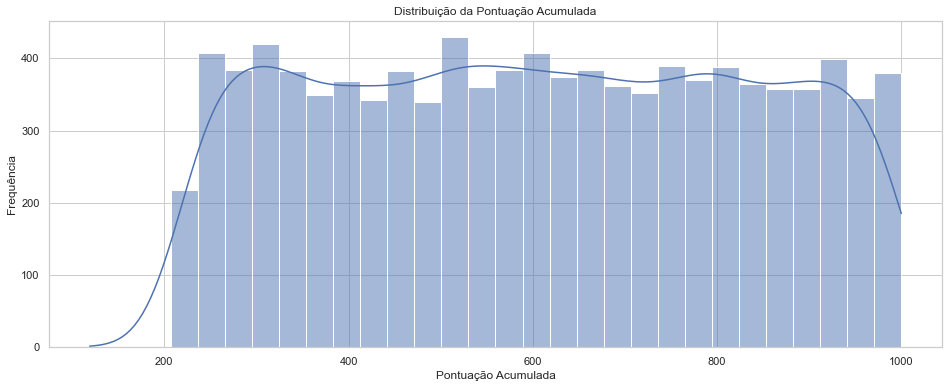

In [354]:
# Histograma
plt.figure(figsize=(16, 6))
sns.histplot(data['PontosAcumulados'], bins=30, kde=True)
plt.title('Distribuição da Pontuação Acumulada')
plt.xlabel('Pontuação Acumulada')
plt.ylabel('Frequência')
plt.show()

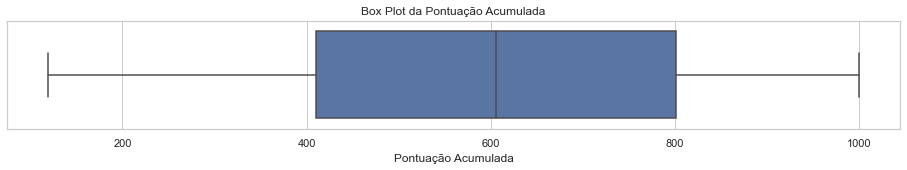

In [355]:
# Boxplot
sns.set(style="whitegrid")

plt.figure(figsize=(16, 2))
sns.boxplot(x='PontosAcumulados', data=data)
plt.title('Box Plot da Pontuação Acumulada')
plt.xlabel('Pontuação Acumulada')
plt.show()

In [302]:
# Definir os rótulos dos grupos
labels = ["{0} - {1}".format(i, i + 99) for i in range(101, 1000, 100)]

# Criar uma nova coluna 
data['PontosAcumulados_grupo'] =  pd.cut(data.PontosAcumulados,
                                        bins=range(101, 1002, 100),
                                        right=False,
                                        labels=labels)

# Verificando os dados da nova coluna
data['PontosAcumulados_grupo'].value_counts()


501 - 600     1350
701 - 800     1279
601 - 700     1274
301 - 400     1267
901 - 1000    1258
801 - 900     1243
401 - 500     1239
201 - 300     1088
101 - 200        2
Name: PontosAcumulados_grupo, dtype: int64

In [303]:
# Agrupar os dados  e contar as ocorrências de Churn e Não Churn
grouped_PontAcum = data.groupby('PontosAcumulados_grupo')['Churn'].value_counts().unstack(fill_value=0)

# Calcular percentuais de Churn e Não Churn
grouped_PontAcum['Total'] = grouped_PontAcum[0] + grouped_PontAcum[1]
grouped_PontAcum['Não_Churn_Percent'] = (grouped_PontAcum[0] / grouped_PontAcum['Total']) * 100
grouped_PontAcum['Churn_Percent'] = (grouped_PontAcum[1] / grouped_PontAcum['Total']) * 100

# Renomear as colunas
grouped_PontAcum.columns = ['Não Churn', 'Churn', 'Total', 'Freq Não Churn', 'Freq Churn']

grouped_PontAcum.reset_index(inplace=True)

# Exibir a tabela
print(grouped_PontAcum)

  PontosAcumulados_grupo  Não Churn  Churn  Total  Freq Não Churn  Freq Churn
0              101 - 200          1      1      2       50.000000   50.000000
1              201 - 300        853    235   1088       78.400735   21.599265
2              301 - 400       1007    260   1267       79.479084   20.520916
3              401 - 500       1004    235   1239       81.033091   18.966909
4              501 - 600       1083    267   1350       80.222222   19.777778
5              601 - 700       1009    265   1274       79.199372   20.800628
6              701 - 800        999    280   1279       78.107897   21.892103
7              801 - 900        989    254   1243       79.565567   20.434433
8             901 - 1000       1017    241   1258       80.842607   19.157393


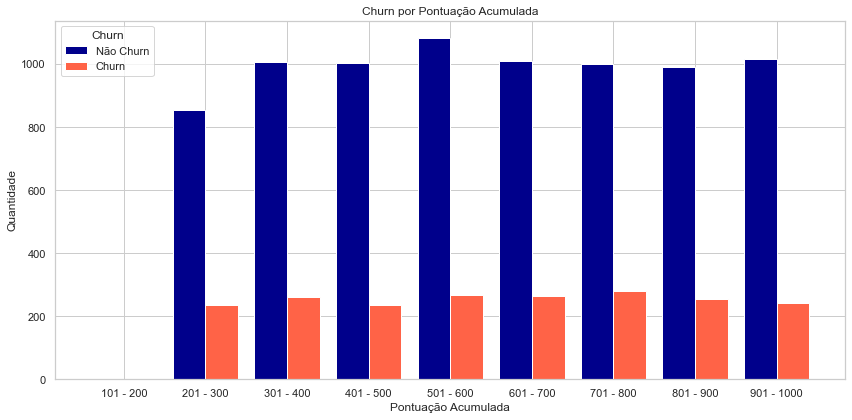

In [356]:
# Agrupar os dados e contar as ocorrências de Churn e Não Churn
grouped_PontAcum = data.groupby('PontosAcumulados_grupo')['Churn'].value_counts().unstack(fill_value=0)

# Definir os rótulos das categorias e a largura das barras
categories = grouped_PontAcum.index
x = np.arange(len(categories))
width = 0.4

# Criar o gráfico de barras agrupadas
fig, ax = plt.subplots(figsize = (12, 6))
for i, (churn_label, color) in enumerate(zip([0, 1], ['darkblue', 'tomato'])):
    values = grouped_PontAcum[churn_label].values
    ax.bar(x + i * width, values, width, label=churn_label, color=color)

# Personalizar o gráfico
ax.set_xlabel('Pontuação Acumulada')
ax.set_ylabel('Quantidade')
ax.set_title('Churn por Pontuação Acumulada')
ax.set_xticks(x + width / 2)
ax.set_xticklabels(categories, rotation=0)

# Adicionar legenda
legend_labels = ['Não Churn', 'Churn']
ax.legend((legend_labels), title='Churn')

plt.tight_layout()
plt.show()

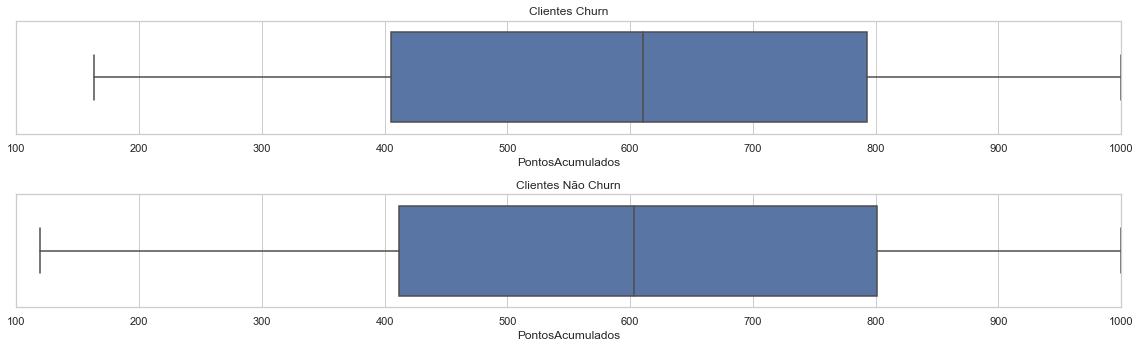

In [358]:
# Box plot da Pontuação Acumuladapara clientes Churn e não-Churn
sns.set(style="whitegrid")

# Definindo os limites para equalizações dos boxplot
lim_min_pontacum = math.floor(min(data['PontosAcumulados'])/ 100) * 100
lim_max_pontacum = math.ceil(max(data['PontosAcumulados']) / 100) * 100

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16, 5))

# Box plot 1 (Clientes Churn)
sns.boxplot(ax=axes[0], x='PontosAcumulados', data=data[data['Churn'] == 1])
axes[0].set_title('Clientes Churn')

# Definir limites iguais para os eixos x
axes[0].set_xlim(lim_min_pontacum, lim_max_pontacum)

# Box plot 2 (Clientes Não Churn)
sns.boxplot(ax=axes[1], x='PontosAcumulados', data=data[data['Churn'] == 0])
axes[1].set_title('Clientes Não Churn')

# Definir limites iguais para os eixos x
axes[1].set_xlim(lim_min_pontacum, lim_max_pontacum)

# Ajustar o layout
plt.tight_layout()

# Exibir o gráfico
plt.show()

### 3.1.9 Localização

As variáveis **LOCALIZAÇÃO**, **GÊNERO** e **TIPOS DE CARTÃO** são categóricas e a análise incial está sendo realizada para identicação destes dados e quais informações relevantes podem ser extraídas para o modelo futuramente

In [339]:
 paises = data['Localizacao'].unique() 
 print(paises)

['France' 'Spain' 'Germany']


In [81]:
# Contando a quantidade de clientes por país
clientes_localizacao = data['Localizacao'].value_counts()

# Criando um DataFrame a partir dos valores contados
tb_localizacao = pd.DataFrame({'País': clientes_localizacao.index, 
                               'Clientes': clientes_localizacao.values})

# Adicionando uma linha de total ao DataFrame
total_clientes = tb_localizacao['Clientes'].sum()
linha_total = pd.DataFrame({'País': ['Total'], 
                            'Clientes': [total_clientes]})
tb_localizacao = pd.concat([tb_localizacao, linha_total], ignore_index=True)

# Exibindo a tabeçla
print(tb_localizacao)

      País  Clientes
0   France      5014
1  Germany      2509
2    Spain      2477
3    Total     10000


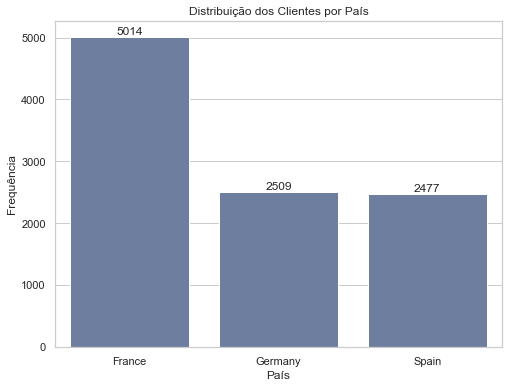

In [91]:
# Contagem de frequência dos países
frequencia_paises = data['Localizacao'].value_counts()

# Gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=frequencia_paises.index, 
            y=frequencia_paises.values, 
            color='#657BA6')
plt.xlabel('País')
plt.ylabel('Frequência')
plt.title('Distribuição dos Clientes por País')

# Adicionando os rótulos de dados
for index, value in enumerate(frequencia_paises.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()

In [92]:
# Agrupar os dados por localização e contar as ocorrências de Churn e Não Churn
grouped_Localizacao = data.groupby('Localizacao')['Churn'].value_counts().unstack(fill_value=0)

# Calcular percentuais de Churn e Não Churn
grouped_Localizacao['Total'] = grouped_Localizacao[0] + grouped_Localizacao[1]
grouped_Localizacao['Não_Churn_Percent'] = (grouped_Localizacao[0] / grouped_Localizacao['Total']) * 100
grouped_Localizacao['Churn_Percent'] = (grouped_Localizacao[1] / grouped_Localizacao['Total']) * 100

# Renomear as colunas
grouped_Localizacao.columns = ['Não Churn', 'Churn', 'Total', 'Freq Não Churn', 'Freq Churn']

# Resetar o índice para ter 'PontuacaoCredito_grupo' como uma coluna
grouped_Localizacao.reset_index(inplace=True)

# Exibir a tabela
print(grouped_Localizacao)

  Localizacao  Não Churn  Churn  Total  Freq Não Churn  Freq Churn
0      France       4203    811   5014       83.825289   16.174711
1     Germany       1695    814   2509       67.556796   32.443204
2       Spain       2064    413   2477       83.326605   16.673395


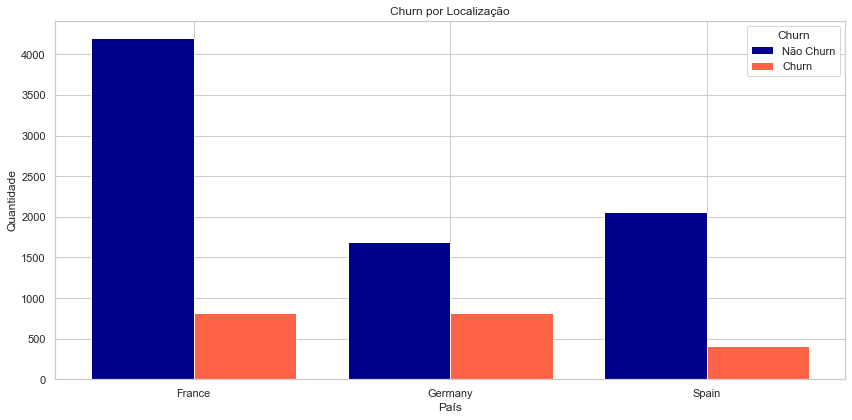

In [106]:
# Agrupar os dados por PontuacaoCredito_grupo e Churn e contar as ocorrências
grouped_Localizacao = data.groupby(['Localizacao', 'Churn']).size().unstack(fill_value=0)

# Definir os rótulos das categorias e a largura das barras
categories = grouped_Localizacao.index
x = np.arange(len(categories))
width = 0.4

# Criar o gráfico de barras agrupadas
fig, ax = plt.subplots(figsize = (12, 6))
for i, (churn_label, color) in enumerate(zip([0, 1], ['darkblue', 'tomato'])):
    values = grouped_Localizacao[churn_label].values
    ax.bar(x + i * width, values, width, label=churn_label, color=color)

# Personalizar o gráfico
ax.set_xlabel('País')
ax.set_ylabel('Quantidade')
ax.set_title('Churn por Localização')
ax.set_xticks(x + width / 2)
ax.set_xticklabels(categories, rotation=0)

# Adicionar legenda
legend_labels = ['Não Churn', 'Churn']
ax.legend((legend_labels), title='Churn')

plt.tight_layout()
plt.show()

### 3.1.10 Genero

In [341]:
genero = data['Genero'].unique() 
print(genero)

['Female' 'Male']


In [166]:
# Contando a quantidade de clientes
clientes_genero = data['Genero'].value_counts()

# Criando um DataFrame a partir dos valores contados
tb_genero = pd.DataFrame({'Gênero': clientes_genero.index, 
                          'Clientes': clientes_genero.values})

# Adicionando uma linha de total ao DataFrame
total_clientes = tb_genero['Clientes'].sum()
linha_total = pd.DataFrame({'Gênero': ['Total'], 
                            'Clientes': [total_clientes]})
tb_genero = pd.concat([tb_genero, linha_total], ignore_index=True)

# Exibindo a tabeçla
print(tb_genero)

   Gênero  Clientes
0    Male      5457
1  Female      4543
2   Total     10000


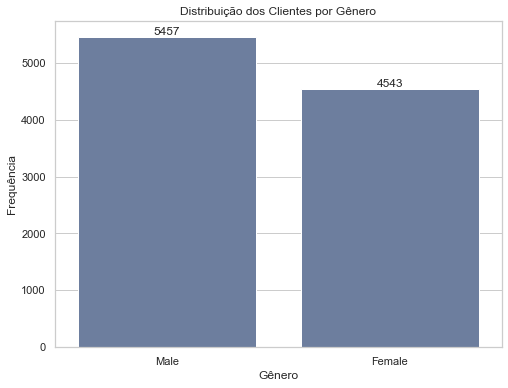

In [167]:
# Contagem de frequência dos gênero
frequencia_genero = data['Genero'].value_counts()

# Gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=frequencia_genero.index, 
            y=frequencia_genero.values, 
            color='#657BA6')
plt.xlabel('Gênero')
plt.ylabel('Frequência')
plt.title('Distribuição dos Clientes por Gênero')

# Adicionando os rótulos de dados
for index, value in enumerate(frequencia_genero.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()

In [105]:
# Agrupar os dados por genero e contar as ocorrências de Churn e Não Churn
grouped_genero = data.groupby('Genero')['Churn'].value_counts().unstack(fill_value=0)

# Calcular percentuais de Churn e Não Churn
grouped_genero['Total'] = grouped_genero[0] + grouped_genero[1]
grouped_genero['Não_Churn_Percent'] = (grouped_genero[0] / grouped_genero['Total']) * 100
grouped_genero['Churn_Percent'] = (grouped_genero[1] / grouped_genero['Total']) * 100

# Renomear as colunas
grouped_genero.columns = ['Não Churn', 'Churn', 'Total', 'Freq Não Churn', 'Freq Churn']

grouped_genero.reset_index(inplace=True)

# Exibir a tabela
print(grouped_genero)

   Genero  Não Churn  Churn  Total  Freq Não Churn  Freq Churn
0  Female       3404   1139   4543       74.928461   25.071539
1    Male       4558    899   5457       83.525747   16.474253


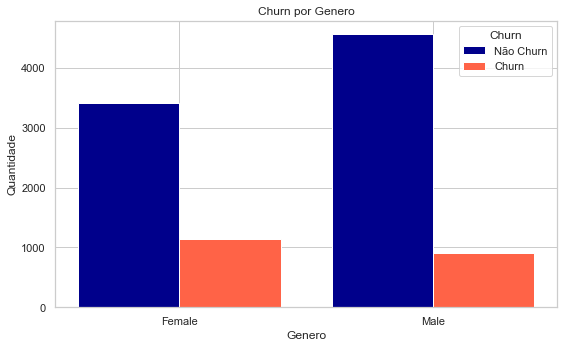

In [361]:
# Agrupar os dados por Genero e Churn e contar as ocorrências
grouped_genero = data.groupby(['Genero', 'Churn']).size().unstack(fill_value=0)

# Definir os rótulos das categorias e a largura das barras
categories = grouped_genero.index
x = np.arange(len(categories))
width = 0.4

# Criar o gráfico de barras agrupadas
fig, ax = plt.subplots(figsize = (8, 5))
for i, (churn_label, color) in enumerate(zip([0, 1], ['darkblue', 'tomato'])):
    values = grouped_genero[churn_label].values
    ax.bar(x + i * width, values, width, label=churn_label, color=color)

# Personalizar o gráfico
ax.set_xlabel('Genero')
ax.set_ylabel('Quantidade')
ax.set_title('Churn por Genero')
ax.set_xticks(x + width / 2)
ax.set_xticklabels(categories, rotation=0)

# Adicionar legenda
legend_labels = ['Não Churn', 'Churn']
ax.legend((legend_labels), title='Churn')

plt.tight_layout()
plt.show()

### 3.1.11 Tipo de Cartão


In [365]:
cartao = data['TipoCartao'].unique() 
print(cartao)

['DIAMOND' 'GOLD' 'SILVER' 'PLATINUM']


In [366]:
# Contando a quantidade de clientes
clientes_tipocartao = data['TipoCartao'].value_counts()

# Criando um DataFrame a partir dos valores contados
tb_tipocartao = pd.DataFrame({'Tipo Cartão': clientes_tipocartao.index, 
                               'Clientes': clientes_tipocartao.values})

# Adicionando uma linha de total ao DataFrame
total_clientes = tb_tipocartao['Clientes'].sum()
linha_total = pd.DataFrame({'Tipo Cartão': ['Total'], 
                            'Clientes': [total_clientes]})
tb_tipocartao = pd.concat([tb_tipocartao, linha_total], ignore_index=True)

# Exibindo a tabela
print(tb_tipocartao)

  Tipo Cartão  Clientes
0     DIAMOND      2507
1        GOLD      2502
2      SILVER      2496
3    PLATINUM      2495
4       Total     10000


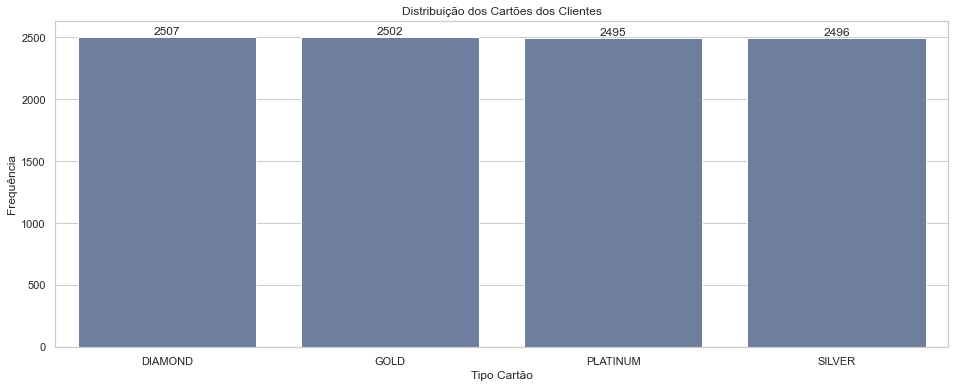

In [367]:
# Contagem de frequência 
frequencia_tipocartao = data['TipoCartao'].value_counts()

# Ordenando a série de frequência pelo índice (Tempo de Permanência)
frequencia_tipocartao = frequencia_tipocartao.sort_index()

# Gráfico de barras
plt.figure(figsize=(16, 6))
sns.barplot(x=frequencia_tipocartao.index, 
            y=frequencia_tipocartao.values, 
            color='#657BA6')
plt.xlabel('Tipo Cartão')
plt.ylabel('Frequência')
plt.title('Distribuição dos Cartões dos Clientes')

# Adicionando os rótulos de dados com alinhamento correto
for index, value in enumerate(frequencia_tipocartao.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()

In [320]:
# Agrupar os dados e contar as ocorrências de Churn e Não Churn
grouped_TipoCartao = data.groupby('TipoCartao')['Churn'].value_counts().unstack(fill_value=0)

# Calcular percentuais de Churn e Não Churn
grouped_TipoCartao['Total'] = grouped_TipoCartao[0] + grouped_TipoCartao[1]
grouped_TipoCartao['Não_Churn_Percent'] = (grouped_TipoCartao[0] / grouped_TipoCartao['Total']) * 100
grouped_TipoCartao['Churn_Percent'] = (grouped_TipoCartao[1] / grouped_TipoCartao['Total']) * 100

# Renomear as colunas
grouped_TipoCartao.columns = ['Não Churn', 'Churn', 'Total', 'Freq Não Churn', 'Freq Churn']

grouped_TipoCartao.reset_index(inplace=True)

# Exibir a tabela
print(grouped_TipoCartao)

  TipoCartao  Não Churn  Churn  Total  Freq Não Churn  Freq Churn
0    DIAMOND       1961    546   2507       78.220981   21.779019
1       GOLD       2020    482   2502       80.735412   19.264588
2   PLATINUM       1987    508   2495       79.639279   20.360721
3     SILVER       1994    502   2496       79.887821   20.112179


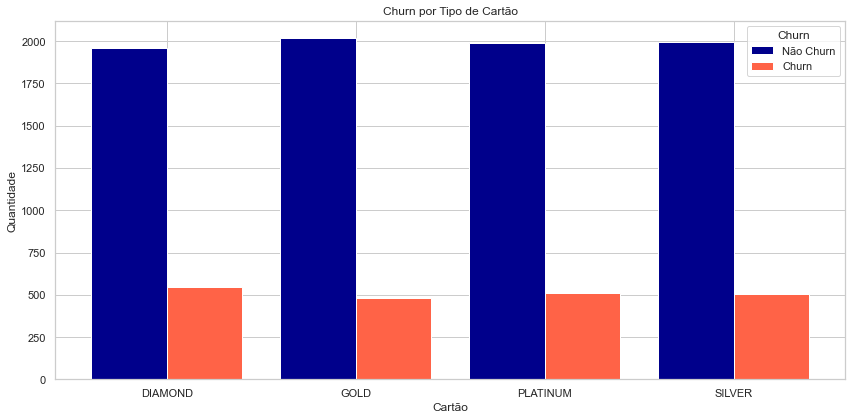

In [368]:
# Agrupar os dados  e contar as ocorrências
grouped_TipoCartao = data.groupby(['TipoCartao', 'Churn']).size().unstack(fill_value=0)

# Definir os rótulos das categorias e a largura das barras
categories = grouped_TipoCartao.index
x = np.arange(len(categories))
width = 0.4

# Criar o gráfico de barras agrupadas
fig, ax = plt.subplots(figsize = (12, 6))
for i, (churn_label, color) in enumerate(zip([0, 1], ['darkblue', 'tomato'])):
    values = grouped_TipoCartao[churn_label].values
    ax.bar(x + i * width, values, width, label=churn_label, color=color)

# Personalizar o gráfico
ax.set_xlabel('Cartão')
ax.set_ylabel('Quantidade')
ax.set_title('Churn por Tipo de Cartão')
ax.set_xticks(x + width / 2)
ax.set_xticklabels(categories, rotation=0)

# Adicionar legenda
legend_labels = ['Não Churn', 'Churn']
ax.legend((legend_labels), title='Churn')

plt.tight_layout()
plt.show()


### 3.1.12 Tem Cartão de Crédito?


As próximas variáveis apresentam dados referentes aos serviços prestados e também sobre o comportamento do cliente. Elas são identificados por 2 alternativas: 0 - Não e 1 - Sim

In [369]:
credito = data['TemCartaoCredito'].unique() 
print(credito)

[1 0]


In [215]:
# Contando a quantidade de clientes com e sem cartão de crédito
clientes_cartao = data['TemCartaoCredito'].value_counts()

# Substituindo os valores 0 e 1 pelos rótulos correspondentes
clientes_cartao.index = clientes_cartao.index.map({0: 'Não Possui', 1: 'Possui'})

# Criando um DataFrame a partir dos valores contados
tb_cartao = pd.DataFrame({'Tem Cartão?': clientes_cartao.index, 
                          'Clientes': clientes_cartao.values})

# Adicionando uma linha de total ao DataFrame
total_clientes = tb_cartao['Clientes'].sum()
linha_total = pd.DataFrame({'Tem Cartão?': ['Total'], 
                            'Clientes': [total_clientes]})
tb_cartao = pd.concat([tb_cartao, linha_total], ignore_index=True)

# Exibindo a tabela
print(tb_cartao)

  Tem Cartão?  Clientes
0      Possui      7055
1  Não Possui      2945
2       Total     10000


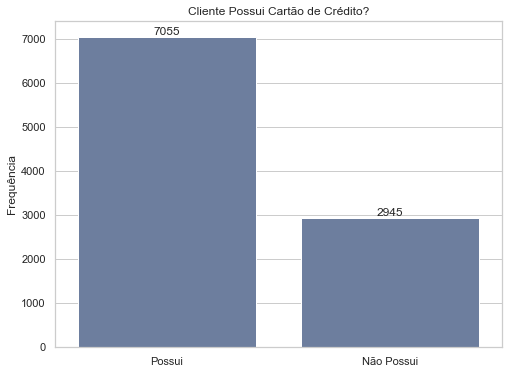

In [370]:
# Contagem de frequência 
frequencia_cartao = data['TemCartaoCredito'].value_counts()

# Substituindo os valores 0 e 1 pelos rótulos correspondentes
frequencia_cartao.index = frequencia_cartao.index.map({0: 'Não Possui', 1: 'Possui'})

# Gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=frequencia_cartao.index, 
            y=frequencia_cartao.values, 
            color='#657BA6')
plt.xlabel('')
plt.ylabel('Frequência')
plt.title('Cliente Possui Cartão de Crédito?')

# Adicionando os rótulos de dados
for index, value in enumerate(frequencia_cartao.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()

In [220]:
# Agrupar os dados e contar as ocorrências de Churn e Não Churn
grouped_cartao = data.groupby('TemCartaoCredito')['Churn'].value_counts().unstack(fill_value=0)

# Substituindo os valores 0 e 1 pelos rótulos correspondentes
grouped_cartao.index = grouped_cartao.index.map({0: 'Não Possui', 1: 'Possui'})

# Calcular percentuais de Churn e Não Churn
grouped_cartao['Total'] = grouped_cartao[0] + grouped_cartao[1]
grouped_cartao['Não_Churn_Percent'] = (grouped_cartao[0] / grouped_cartao['Total']) * 100
grouped_cartao['Churn_Percent'] = (grouped_cartao[1] / grouped_cartao['Total']) * 100

# Renomear as colunas
grouped_cartao.columns = ['Não Churn', 'Churn', 'Total', 'Freq Não Churn', 'Freq Churn']

grouped_cartao.reset_index(inplace=True)

# Exibir a tabela
print(grouped_cartao)

  TemCartaoCredito  Não Churn  Churn  Total  Freq Não Churn  Freq Churn
0       Não Possui       2332    613   2945       79.185059   20.814941
1           Possui       5630   1425   7055       79.801559   20.198441


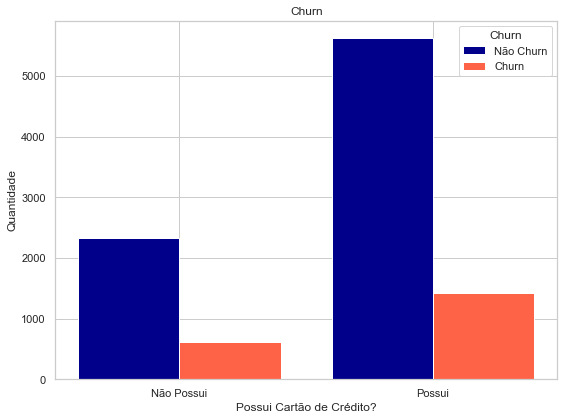

In [371]:
# Agrupar os dados e contar as ocorrências de Churn e Não Churn
grouped_cartao = data.groupby('TemCartaoCredito')['Churn'].value_counts().unstack(fill_value=0)

# Substituindo os valores 0 e 1 pelos rótulos correspondentes
grouped_cartao.index = grouped_cartao.index.map({0: 'Não Possui', 1: 'Possui'})

# Definir os rótulos das categorias e a largura das barras
categories = grouped_cartao.index
x = np.arange(len(categories))
width = 0.4

# Criar o gráfico de barras agrupadas
fig, ax = plt.subplots(figsize = (8, 6))
for i, (churn_label, color) in enumerate(zip([0, 1], ['darkblue', 'tomato'])):
    values = grouped_cartao[churn_label].values
    ax.bar(x + i * width, values, width, label=churn_label, color=color)

# Personalizar o gráfico
ax.set_xlabel('Possui Cartão de Crédito?')
ax.set_ylabel('Quantidade')
ax.set_title('Churn')
ax.set_xticks(x + width / 2)
ax.set_xticklabels(categories, rotation=0)

# Adicionar legenda
legend_labels = ['Não Churn', 'Churn']
ax.legend((legend_labels), title='Churn')

plt.tight_layout()
plt.show()

### 3.1.13 Membro Ativo

In [372]:
credito = data['MembroAtivo'].unique() 
print(credito)

[1 0]


In [224]:
# Contando a quantidade de clientes
clientes_ativo = data['MembroAtivo'].value_counts()

# Substituindo os valores 0 e 1 pelos rótulos correspondentes
clientes_ativo.index = clientes_ativo.index.map({0: 'Não', 1: 'Sim'})

# Criando um DataFrame a partir dos valores contados
tb_ativo = pd.DataFrame({'É cliente ativo?': clientes_ativo.index, 
                          'Clientes': clientes_ativo.values})

# Adicionando uma linha de total ao DataFrame
total_clientes = tb_ativo['Clientes'].sum()
linha_total = pd.DataFrame({'É cliente ativo?': ['Total'], 
                            'Clientes': [total_clientes]})
tb_ativo = pd.concat([tb_ativo, linha_total], ignore_index=True)

# Exibindo a tabela
print(tb_ativo)

  É cliente ativo?  Clientes
0              Sim      5151
1              Não      4849
2            Total     10000


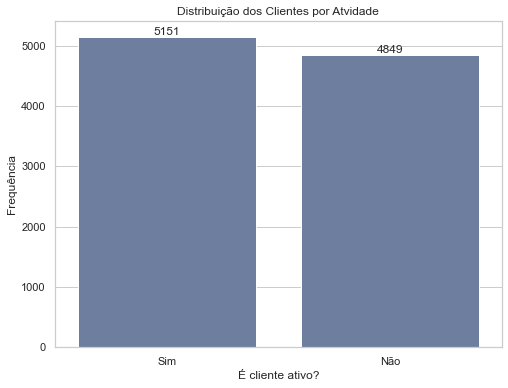

In [230]:
# Contagem de frequência
frequencia_ativo = data['MembroAtivo'].value_counts()

# Substituindo os valores 0 e 1 pelos rótulos correspondentes
frequencia_ativo.index = frequencia_ativo.index.map({0: 'Não', 1: 'Sim'})

# Gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=frequencia_ativo.index, 
            y=frequencia_ativo.values, 
            color='#657BA6')
plt.xlabel('É cliente ativo?')
plt.ylabel('Frequência')
plt.title('Distribuição dos Clientes por Atividade')

# Adicionando os rótulos de dados
for index, value in enumerate(frequencia_ativo.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()

In [232]:
# Agrupar os dados  e contar as ocorrências de Churn e Não Churn
grouped_ativo = data.groupby('MembroAtivo')['Churn'].value_counts().unstack(fill_value=0)

# Substituindo os valores 0 e 1 pelos rótulos correspondentes
grouped_ativo.index = grouped_ativo.index.map({0: 'Não', 1: 'Sim'})

# Calcular percentuais de Churn e Não Churn
grouped_ativo['Total'] = grouped_ativo[0] + grouped_ativo[1]
grouped_ativo['Não_Churn_Percent'] = (grouped_ativo[0] / grouped_ativo['Total']) * 100
grouped_ativo['Churn_Percent'] = (grouped_ativo[1] / grouped_ativo['Total']) * 100

# Renomear as colunas
grouped_ativo.columns = ['Não Churn', 'Churn', 'Total', 'Freq Não Churn', 'Freq Churn']

grouped_ativo.reset_index(inplace=True)

# Exibir a tabela
print(grouped_ativo)

  MembroAtivo  Não Churn  Churn  Total  Freq Não Churn  Freq Churn
0         Não       3546   1303   4849       73.128480   26.871520
1         Sim       4416    735   5151       85.730926   14.269074


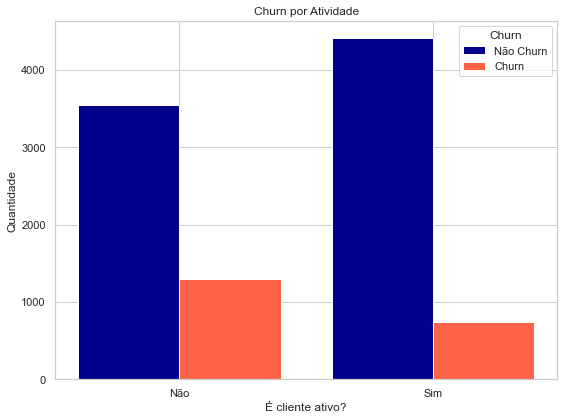

In [373]:
# Agrupar os dados e contar as ocorrências de Churn e Não Churn
grouped_ativo = data.groupby('MembroAtivo')['Churn'].value_counts().unstack(fill_value=0)

# Substituindo os valores 0 e 1 pelos rótulos correspondentes
grouped_ativo.index = grouped_ativo.index.map({0: 'Não', 1: 'Sim'})

# Definir os rótulos das categorias e a largura das barras
categories = grouped_ativo.index
x = np.arange(len(categories))
width = 0.4

# Criar o gráfico de barras agrupadas
fig, ax = plt.subplots(figsize = (8, 6))
for i, (churn_label, color) in enumerate(zip([0, 1], ['darkblue', 'tomato'])):
    values = grouped_ativo[churn_label].values
    ax.bar(x + i * width, values, width, label=churn_label, color=color)

# Personalizar o gráfico
ax.set_xlabel('É cliente ativo?')
ax.set_ylabel('Quantidade')
ax.set_title('Churn por Atividade')
ax.set_xticks(x + width / 2)
ax.set_xticklabels(categories, rotation=0)

# Adicionar legenda
legend_labels = ['Não Churn', 'Churn']
ax.legend((legend_labels), title='Churn')

plt.tight_layout()
plt.show()


### 3.1.14 Reclamações

In [374]:
credito = data['Reclamacoes'].unique() 
print(credito)


[1 0]


In [273]:
# Contando a quantidade de clientes
clientes_reclamacao = data['Reclamacoes'].value_counts()

# Substituindo os valores 0 e 1 pelos rótulos correspondentes
clientes_reclamacao.index = clientes_reclamacao.index.map({0: 'Não', 1: 'Sim'})

# Criando um DataFrame a partir dos valores contados
tb_reclamacao = pd.DataFrame({'Teve Reclamação?': clientes_reclamacao.index, 
                          'Clientes': clientes_reclamacao.values})

# Adicionando uma linha de total ao DataFrame
total_clientes = tb_reclamacao['Clientes'].sum()
linha_total = pd.DataFrame({'Teve Reclamação?': ['Total'], 
                            'Clientes': [total_clientes]})
tb_cartao = pd.concat([tb_reclamacao, linha_total], ignore_index=True)

# Exibindo a tabela
print(tb_reclamacao)

  Teve Reclamação?  Clientes
0              Não      7956
1              Sim      2044


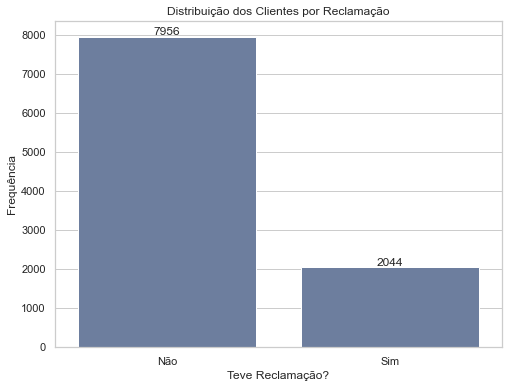

In [375]:
# Contagem de frequência
frequencia_reclamacao = data['Reclamacoes'].value_counts()

# Substituindo os valores 0 e 1 pelos rótulos correspondentes
frequencia_reclamacao.index = frequencia_reclamacao.index.map({0: 'Não', 1: 'Sim'})

# Gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=frequencia_reclamacao.index, 
            y=frequencia_reclamacao.values, 
            color='#657BA6')
plt.xlabel('Teve Reclamação?')
plt.ylabel('Frequência')
plt.title('Distribuição dos Clientes por Reclamação')

# Adicionando os rótulos de dados
for index, value in enumerate(frequencia_reclamacao.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()

In [376]:
# Agrupar os dados e contar as ocorrências de Churn e Não Churn
grouped_reclamacao = data.groupby('Reclamacoes')['Churn'].value_counts().unstack(fill_value=0)

# Substituindo os valores 0 e 1 pelos rótulos correspondentes
grouped_reclamacao.index = grouped_reclamacao.index.map({0: 'Não', 1: 'Sim'})

# Calcular percentuais de Churn e Não Churn
grouped_reclamacao['Total'] = grouped_reclamacao[0] + grouped_reclamacao[1]
grouped_reclamacao['Não_Churn_Percent'] = (grouped_reclamacao[0] / grouped_reclamacao['Total']) * 100
grouped_reclamacao['Churn_Percent'] = (grouped_reclamacao[1] / grouped_reclamacao['Total']) * 100

# Renomear as colunas
grouped_reclamacao.columns = ['Não Churn', 'Churn', 'Total', 'Freq Não Churn', 'Freq Churn']

grouped_reclamacao.reset_index(inplace=True)

# Exibir a tabela
print(grouped_reclamacao)

  Reclamacoes  Não Churn  Churn  Total  Freq Não Churn  Freq Churn
0         Não       7952      4   7956       99.949723    0.050277
1         Sim         10   2034   2044        0.489237   99.510763


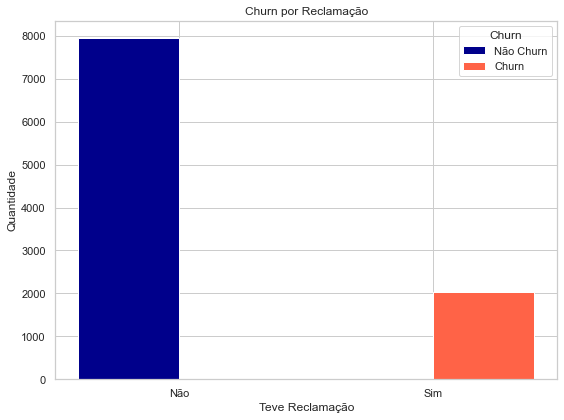

In [377]:
# Agrupar os dados e contar as ocorrências de Churn e Não Churn
grouped_reclamacao = data.groupby('Reclamacoes')['Churn'].value_counts().unstack(fill_value=0)

# Substituindo os valores 0 e 1 pelos rótulos correspondentes
grouped_reclamacao.index = grouped_reclamacao.index.map({0: 'Não', 1: 'Sim'})

# Definir os rótulos das categorias e a largura das barras
categories = grouped_reclamacao.index
x = np.arange(len(categories))
width = 0.4

# Criar o gráfico de barras agrupadas
fig, ax = plt.subplots(figsize = (8, 6))
for i, (churn_label, color) in enumerate(zip([0, 1], ['darkblue', 'tomato'])):
    values = grouped_reclamacao[churn_label].values
    ax.bar(x + i * width, values, width, label=churn_label, color=color)

# Personalizar o gráfico
ax.set_xlabel('Teve Reclamação')
ax.set_ylabel('Quantidade')
ax.set_title('Churn por Reclamação')
ax.set_xticks(x + width / 2)
ax.set_xticklabels(categories, rotation=0)

# Adicionar legenda
legend_labels = ['Não Churn', 'Churn']
ax.legend((legend_labels), title='Churn')

plt.tight_layout()
plt.show()

# 4 Tratamento de Dados

Após finalizada a Exploração dos Dados, será definido o tratamento dos dados. Observamos que o conjunto de dados não continha Dados Faltantes, contudo, visualizamos, pelos boxplot, que algumas variáveis contém outliers. Vamos analisar e fazer o devido tratamento dos mesmos.

Iremos fazer a detecção e remoção de outliers através da técnica de IQR score (interquartile range). O IQR é o primeiro quartil subtraído do terceiro quartil.

In [379]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

PontuacaoCredito       134.0000
Idade                   12.0000
TempoPermanencia         4.0000
Saldo               127644.2400
Produtos                 1.0000
TemCartaoCredito         1.0000
MembroAtivo              1.0000
SalarioEstimado      98386.1375
Churn                    0.0000
Reclamacoes              0.0000
IndiceSatisfacao         2.0000
PontosAcumulados       391.0000
dtype: float64


Definimos neste momento que as variáveis **PONTUAÇÃO CRÉDITO**, **SALDO EM CONTA** e **PONTOS ACUMULADOS** são as que possuem maior interferência nos dados, e, assim sendo, eliminaremos para melhor balancear o nosso modelo

In [381]:
# Calculando o IQR para as variáveis específicas
Q1 = data[['PontuacaoCredito', 'Saldo', 'SalarioEstimado', 'PontosAcumulados']].quantile(0.25)
Q3 = data[['PontuacaoCredito', 'Saldo', 'SalarioEstimado', 'PontosAcumulados']].quantile(0.75)
IQR = Q3 - Q1

# Removendo outliers apenas para as variáveis específicas
data = data[~((data[['PontuacaoCredito', 'Saldo', 'SalarioEstimado', 'PontosAcumulados']] < (Q1 - 1.5 * IQR)) | (data[['PontuacaoCredito', 'Saldo', 'SalarioEstimado', 'PontosAcumulados']] > (Q3 + 1.5 * IQR))).any(axis=1)]

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9985 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   PontuacaoCredito        9985 non-null   int64   
 1   Localizacao             9985 non-null   object  
 2   Genero                  9985 non-null   object  
 3   Idade                   9985 non-null   int64   
 4   TempoPermanencia        9985 non-null   int64   
 5   Saldo                   9985 non-null   float64 
 6   Produtos                9985 non-null   int64   
 7   TemCartaoCredito        9985 non-null   int64   
 8   MembroAtivo             9985 non-null   int64   
 9   SalarioEstimado         9985 non-null   float64 
 10  Churn                   9985 non-null   int64   
 11  Reclamacoes             9985 non-null   int64   
 12  IndiceSatisfacao        9985 non-null   int64   
 13  TipoCartao              9985 non-null   object  
 14  PontosAcumulados        